In [82]:
!pip install numpy pandas matplotlib seaborn sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
data=pd.read_csv('CVD_cleaned (1).csv')
data.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poo,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,16
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,8
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,0


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  int64  
 12  Weight_(kg)                   308854 non-nul

In [85]:
data.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


In [86]:
data.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [ ]:
print(data.describe())

# Calculate range (max - min)
df_range = data.max() - data.min()
print("Range:\n", df_range)

# Variance and Standard Deviation
print("Variance:\n", data.var())
print("Standard Deviation:\n", data.std())


       General_Health  Heart_Disease     Depression       Diabetes  \
count   308854.000000  308854.000000  308854.000000  308854.000000   
mean         0.227237      -0.325238      -0.799570      -0.555350   
std          0.519078       0.365257       0.771230       0.577561   
min         -0.548109      -0.433567      -1.185692      -0.807653   
25%         -0.548109      -0.433567      -1.185692      -0.807653   
50%          0.582143      -0.433567      -1.185692      -0.807653   
75%          0.582143      -0.433567      -1.185692      -0.807653   
max          0.693260       0.906304       0.740858       0.936475   

        Age_Category    Weight_(kg)            BMI  Alcohol_Consumption  \
count  308854.000000  308854.000000  308854.000000        308854.000000   
mean        0.286457       0.007228      -0.000992            -1.636040   
std         0.371740       0.732572       0.641512             1.823377   
min        -0.849839      -3.621511      -5.885660            -3.5617

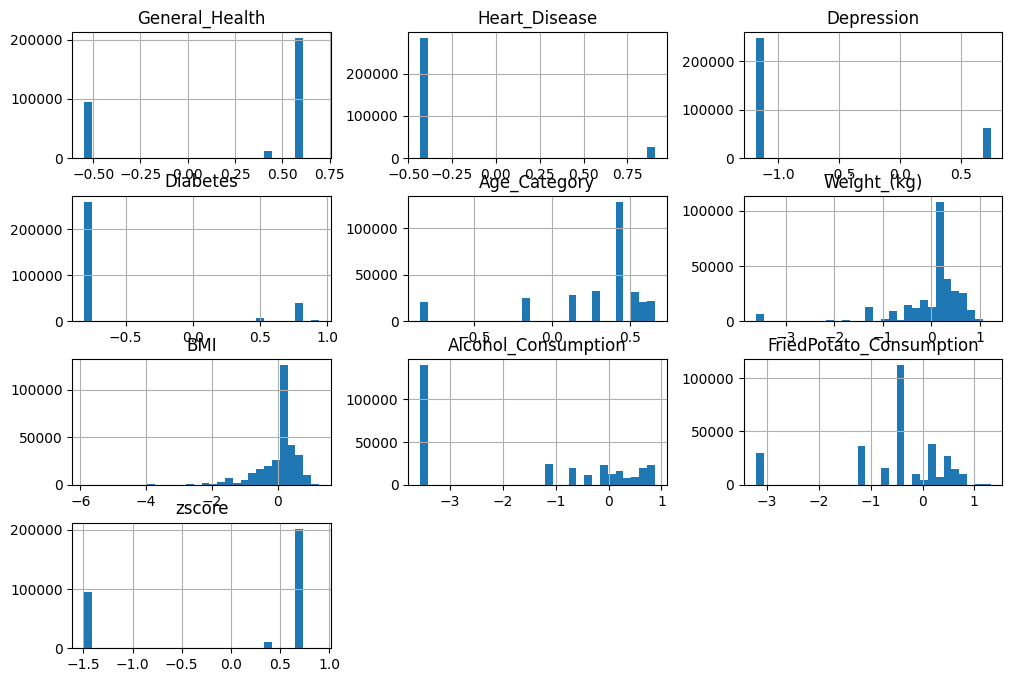

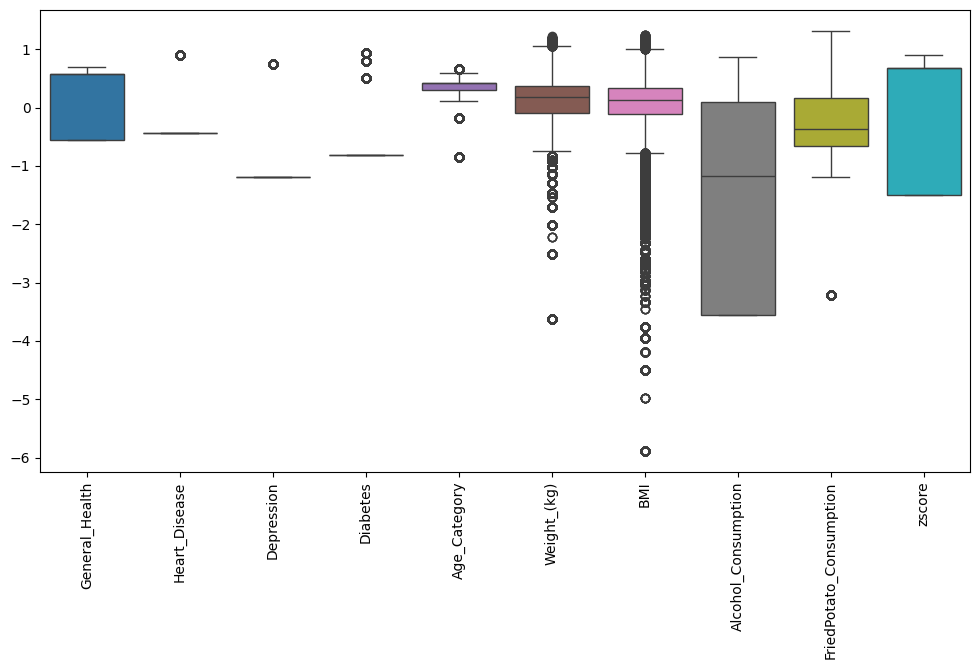

In [205]:
# Histogram for numerical columns
data.hist(figsize=(12, 8), bins=30)
plt.show()

# Boxplot to check outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=data.select_dtypes(include=['int64', 'float64']))
plt.xticks(rotation=90)
plt.show()


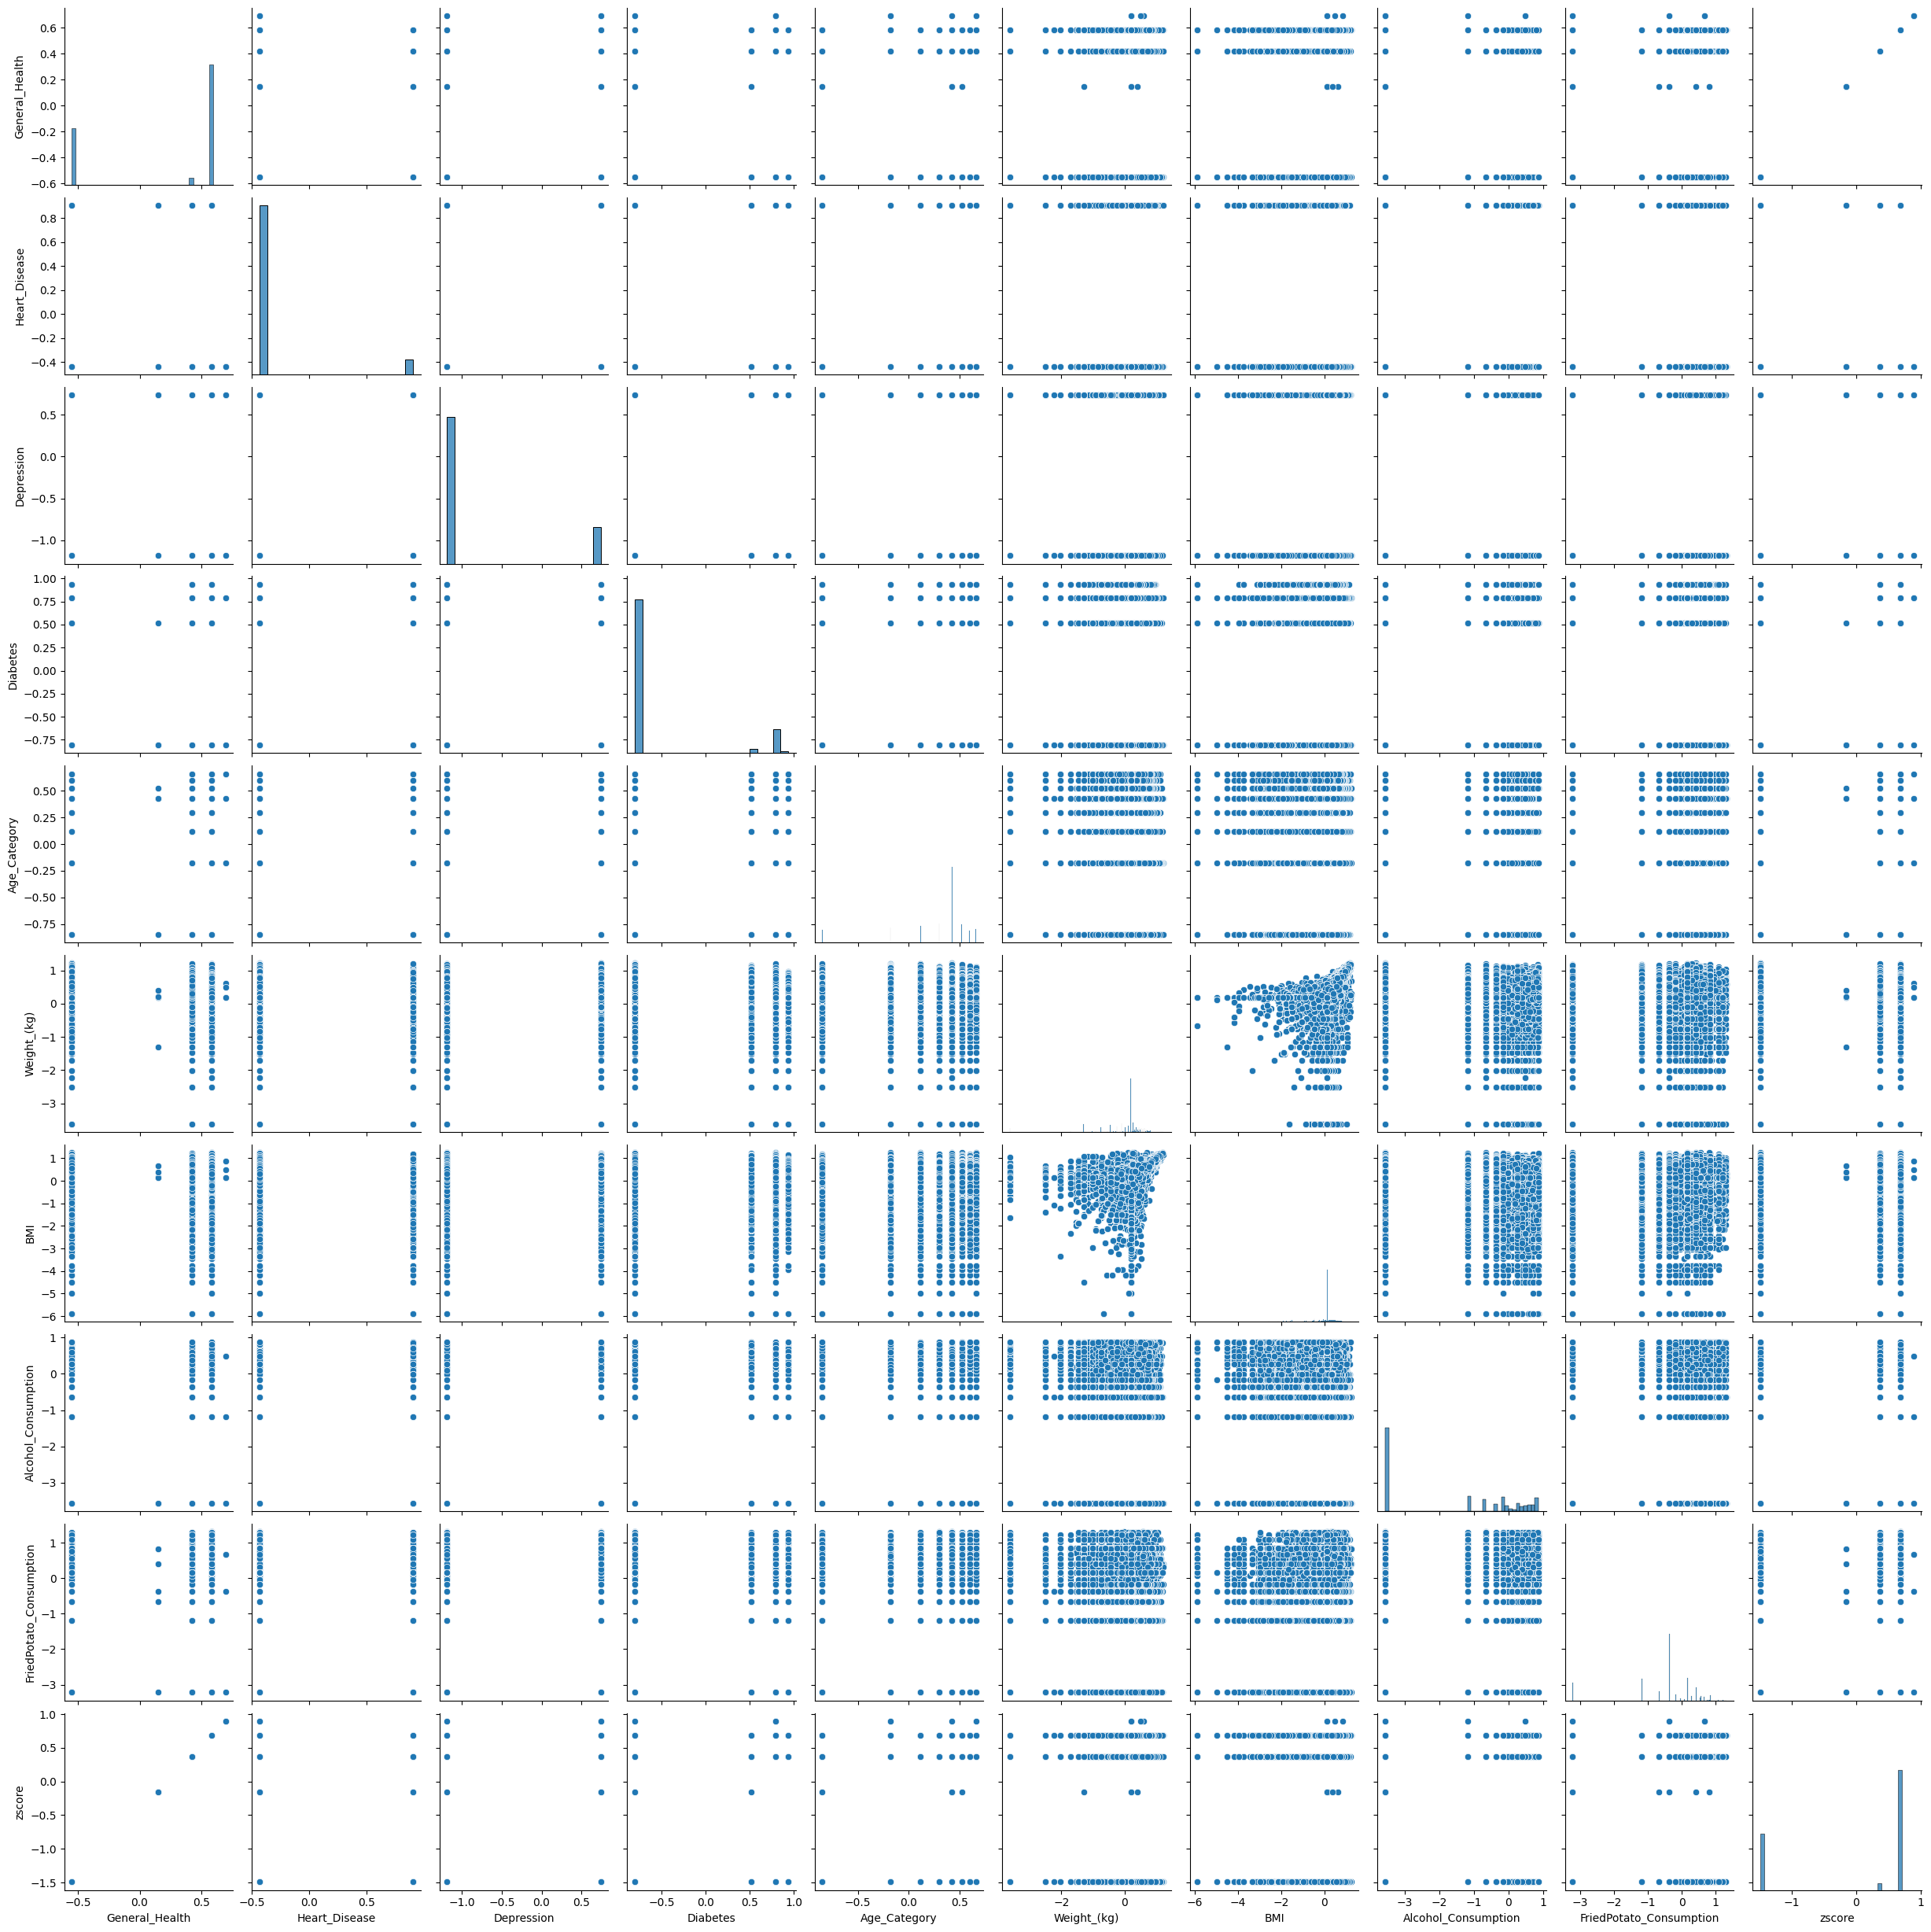

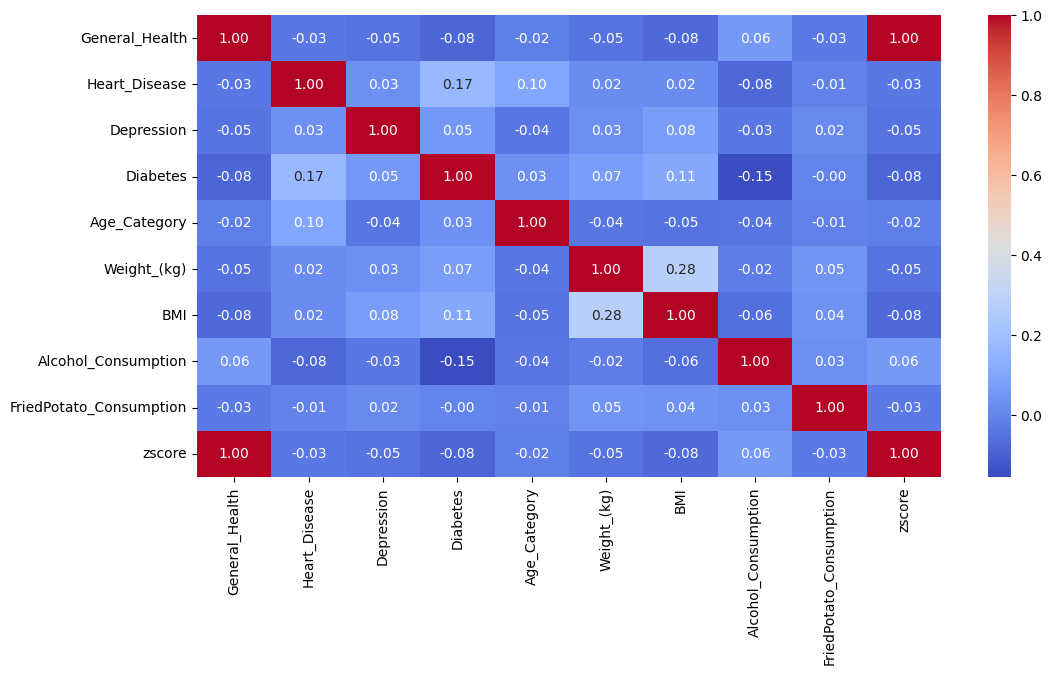

In [206]:
# Scatter plot (for numeric data)
sns.pairplot(data.select_dtypes(include=['int64', 'float64']))
plt.show()

# Heatmap for correlation
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


In [207]:
# Skewness
print("Skewness:\n", data.skew())

# Kurtosis
print("Kurtosis:\n", data.kurt())


Skewness:
 General_Health            -0.817904
Heart_Disease              3.075152
Depression                 1.496718
Diabetes                   1.865016
Age_Category              -1.948166
Weight_(kg)               -2.901336
BMI                       -2.377840
Alcohol_Consumption        0.015720
FriedPotato_Consumption   -1.539789
zscore                    -0.817904
dtype: float64
Kurtosis:
 General_Health             -1.319190
Heart_Disease               7.456610
Depression                  0.240166
Diabetes                    1.509095
Age_Category                3.264148
Weight_(kg)                10.746282
BMI                         9.546907
Alcohol_Consumption        -1.790181
FriedPotato_Consumption     1.975776
zscore                     -1.319190
dtype: float64


In [208]:
# Covariance matrix
print("Covariance Matrix:\n", data.cov())

# Correlation matrix
print("Correlation Matrix:\n", data.corr())


Covariance Matrix:
                          General_Health  Heart_Disease  Depression  Diabetes  \
General_Health                 0.269442      -0.006456   -0.018754 -0.025480   
Heart_Disease                 -0.006456       0.133412    0.009162  0.036018   
Depression                    -0.018754       0.009162    0.594795  0.023832   
Diabetes                      -0.025480       0.036018    0.023832  0.333577   
Age_Category                  -0.003433       0.013541   -0.010853  0.007429   
Weight_(kg)                   -0.018103       0.005594    0.016074  0.030548   
BMI                           -0.025043       0.004059    0.037313  0.039758   
Alcohol_Consumption            0.055047      -0.053912   -0.047131 -0.162532   
FriedPotato_Consumption       -0.016581      -0.002568    0.012426 -0.001017   
zscore                         0.519078      -0.012438   -0.036130 -0.049088   

                         Age_Category  Weight_(kg)       BMI  \
General_Health              -0.0034

In [87]:
categorical_columns = ["General_Health","Checkup","Exercise","Heart_Disease","Skin_Cancer", "Other_Cancer", "Depression", "Diabetes", "Arthritis", "Sex", "Age_Category", "Smoking_History"]
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

In [88]:
data.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,3,2,0,0,0,0,0,0,1,1,10,150,32.66,14.54,1,0,30,16,12
1,5,4,0,1,0,0,0,2,0,1,10,165,77.11,28.29,0,0,30,0,4
2,5,4,1,0,0,0,0,2,0,1,8,163,88.45,33.47,0,4,12,3,16
3,4,4,1,1,0,0,0,2,0,3,11,180,93.44,28.73,0,0,30,30,8
4,2,4,0,0,0,0,0,0,0,3,12,191,88.45,24.37,1,0,8,4,0


In [89]:
for col in data.columns:
    if data[col].nunique() == 1:
        data.drop(columns=[col], inplace=True)
print(data.columns)

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')


In [90]:
data.drop(columns=['Fruit_Consumption', 'Green_Vegetables_Consumption', 'Height_(cm)', 'Checkup','Arthritis','Skin_Cancer','Other_Cancer','Checkup'], inplace=True)


In [91]:
data.columns

Index(['General_Health', 'Exercise', 'Heart_Disease', 'Depression', 'Diabetes',
       'Sex', 'Age_Category', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [92]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:", numerical_columns)

Numerical Columns: Index(['General_Health', 'Exercise', 'Heart_Disease', 'Depression', 'Diabetes',
       'Sex', 'Age_Category', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'FriedPotato_Consumption'],
      dtype='object')


In [93]:
cols_to_fill = ['General_Health', 'Exercise', 'Heart_Disease', 'Depression', 'Diabetes',
                'Sex', 'Age_Category', 'Weight_(kg)', 'BMI', 'Smoking_History',
                'Alcohol_Consumption', 'FriedPotato_Consumption']

data[cols_to_fill] = data[cols_to_fill].apply(lambda col: col.fillna(col.median()))


<Figure size 1200x800 with 0 Axes>

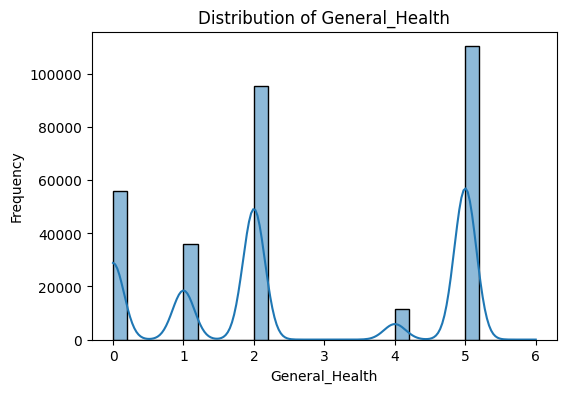

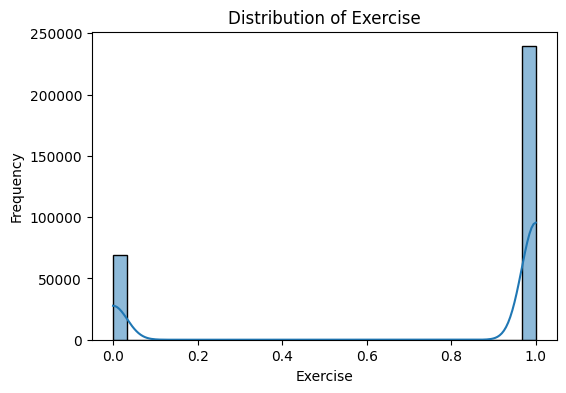

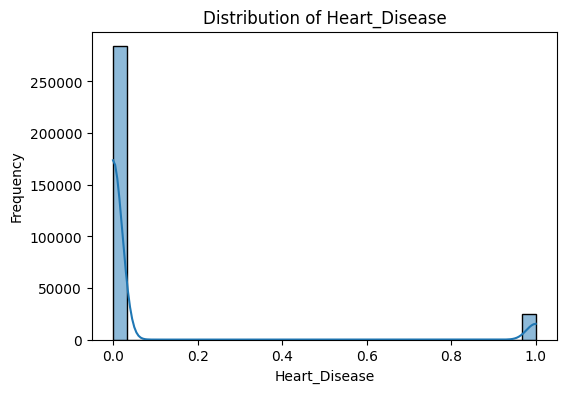

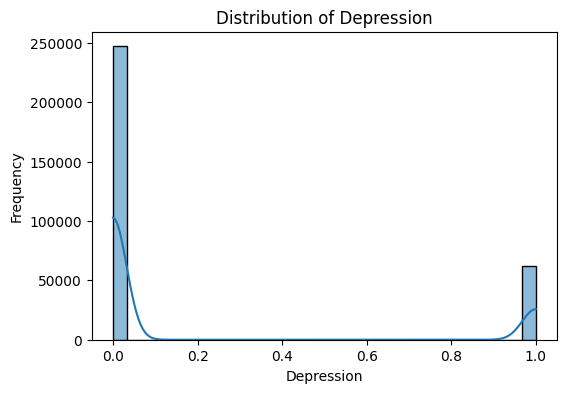

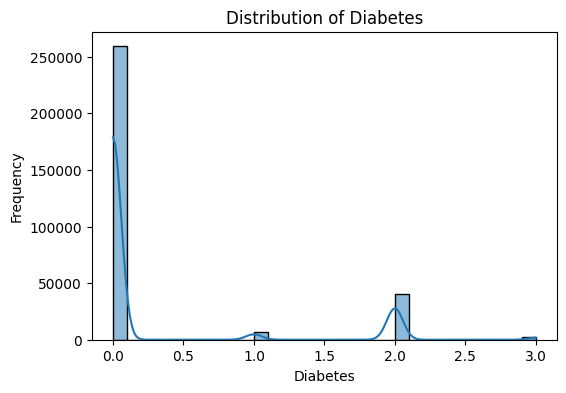

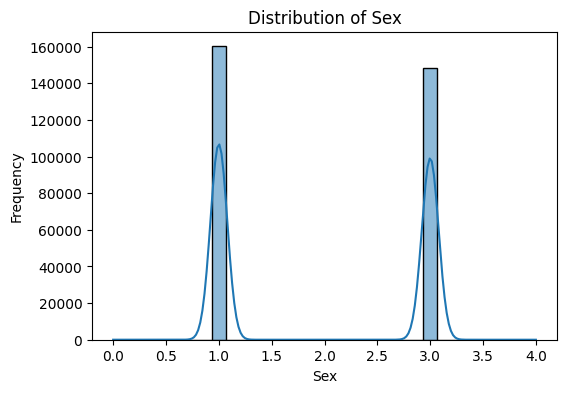

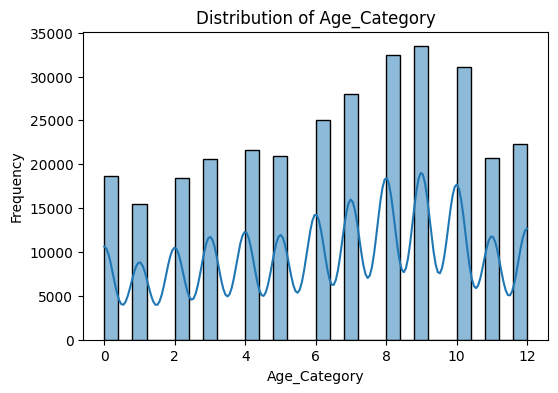

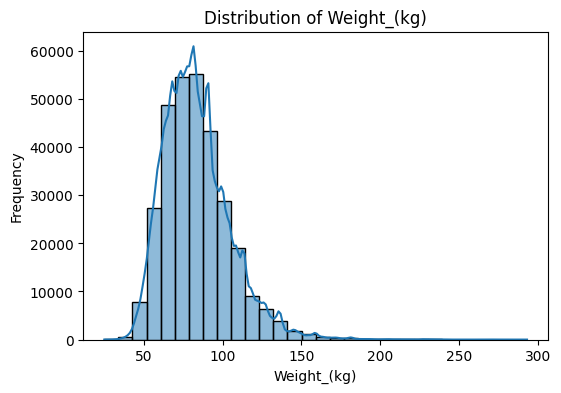

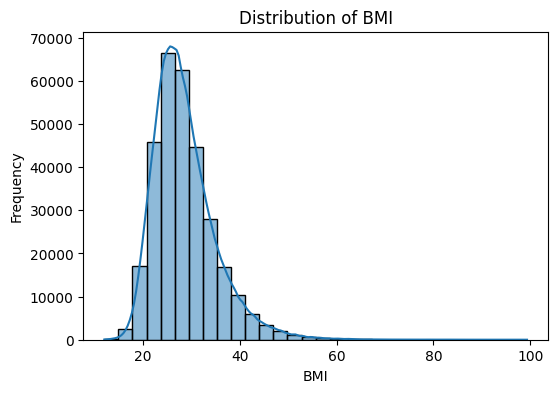

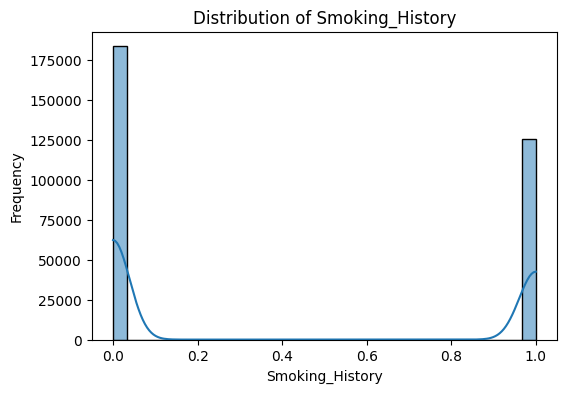

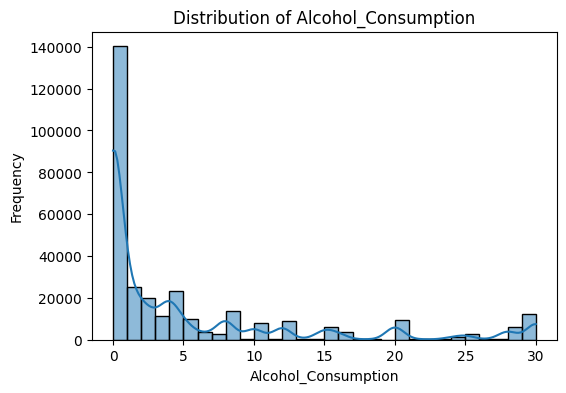

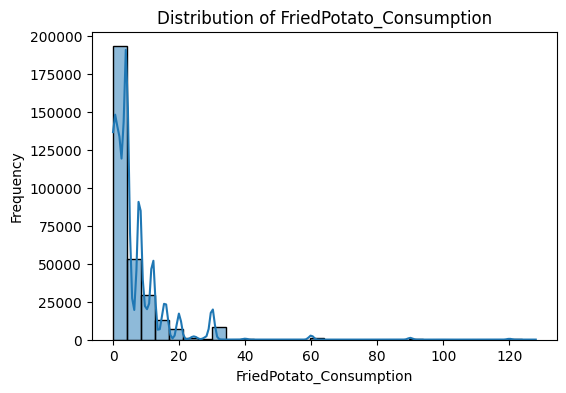

In [94]:
numerical_columns = ['General_Health', 'Exercise', 'Heart_Disease', 'Depression', 'Diabetes',
                     'Sex', 'Age_Category', 'Weight_(kg)', 'BMI', 'Smoking_History',
                     'Alcohol_Consumption', 'FriedPotato_Consumption']

# Plot histograms for each numerical column
plt.figure(figsize=(12, 8))
for col in numerical_columns:
    plt.figure(figsize=(6, 4))  # Set individual figure size
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

<Figure size 1200x800 with 0 Axes>

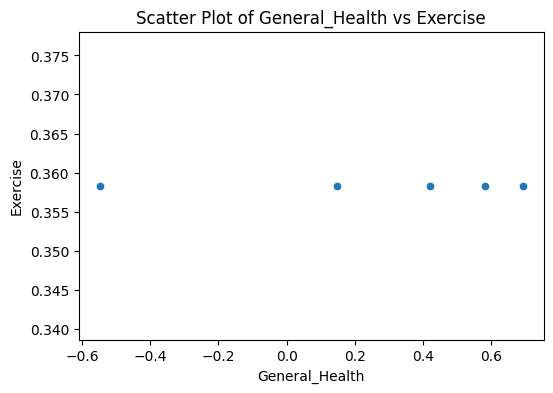

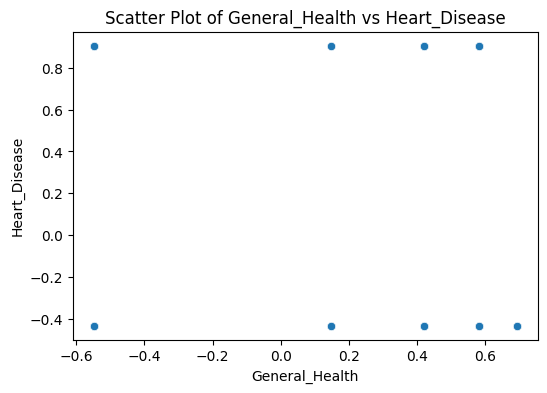

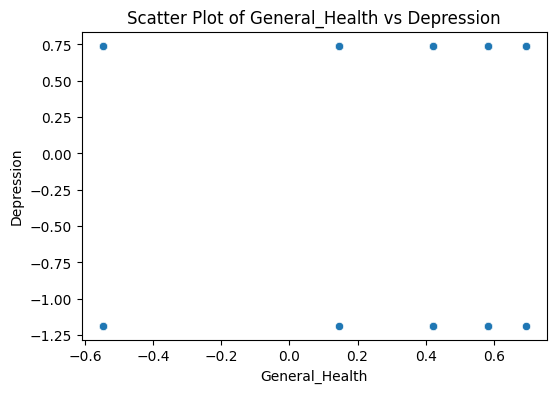

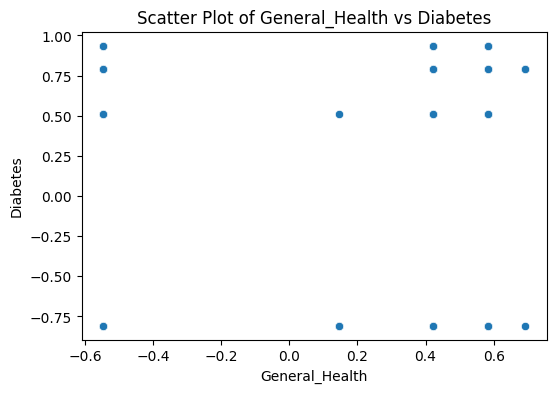

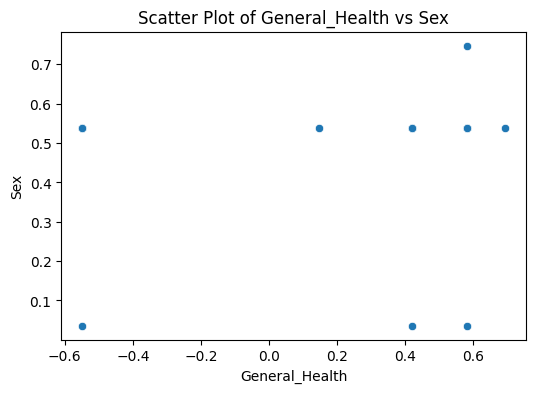

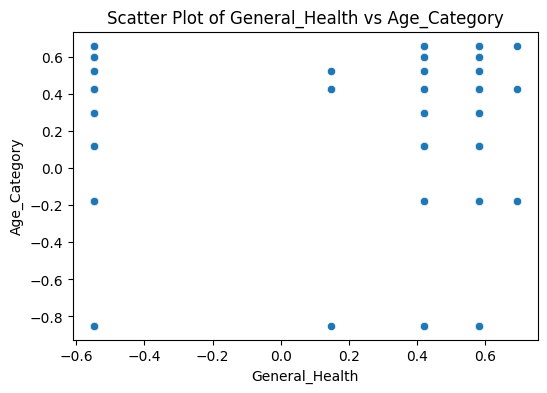

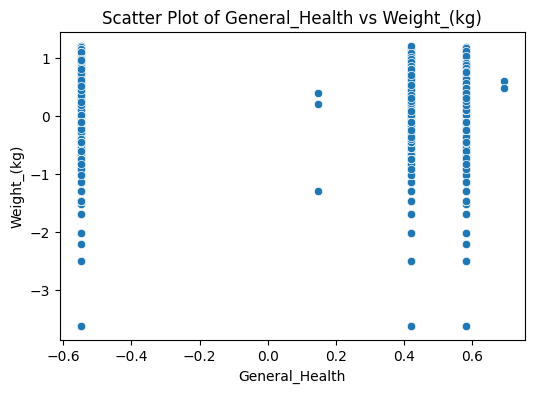

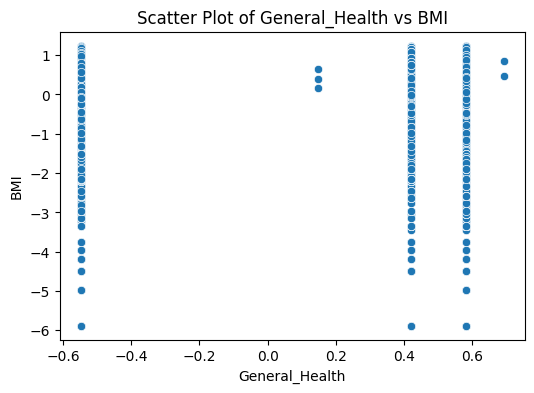

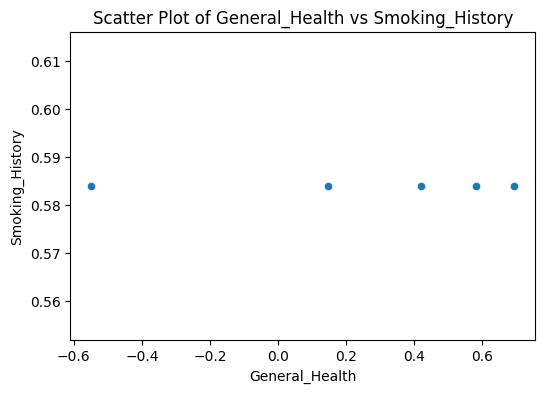

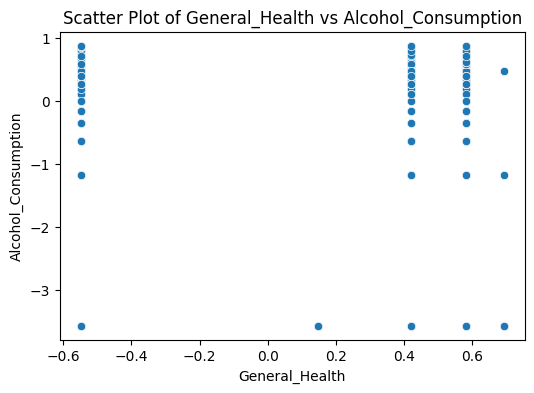

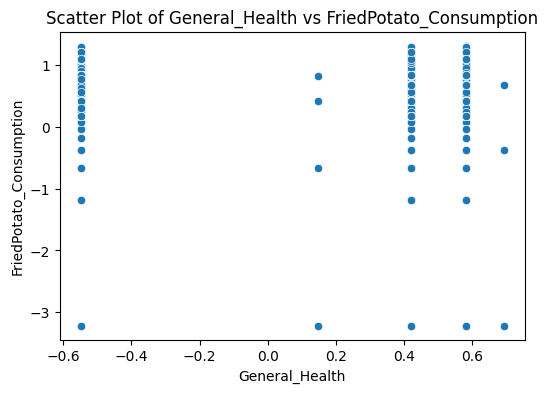

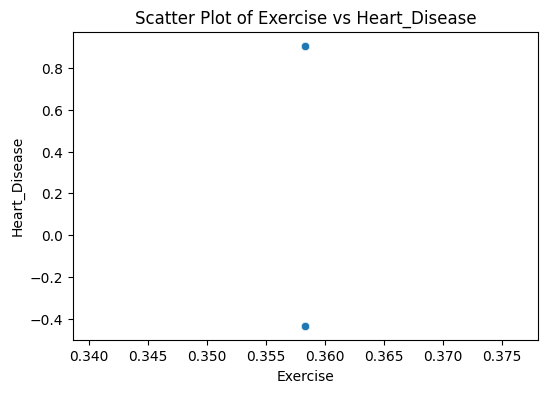

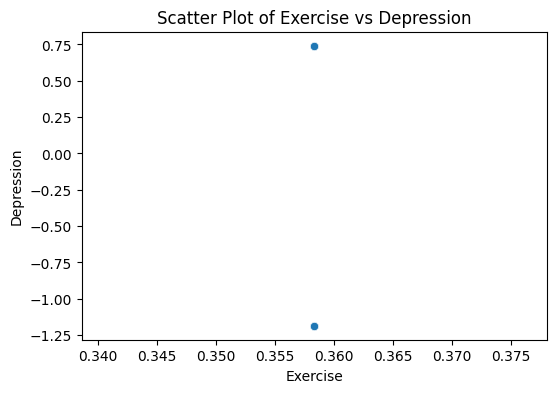

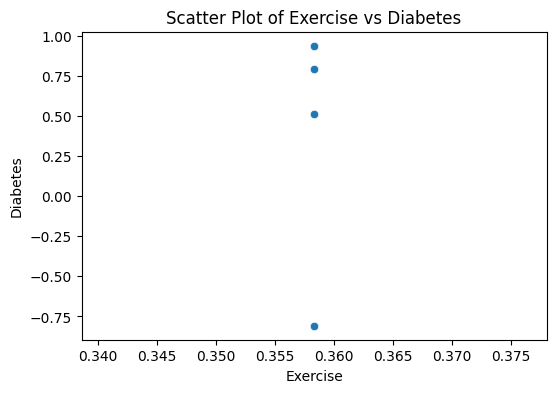

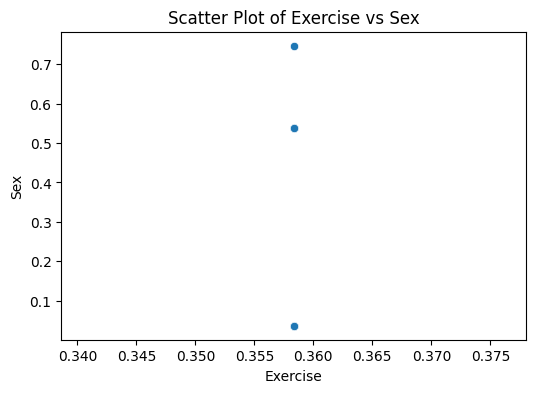

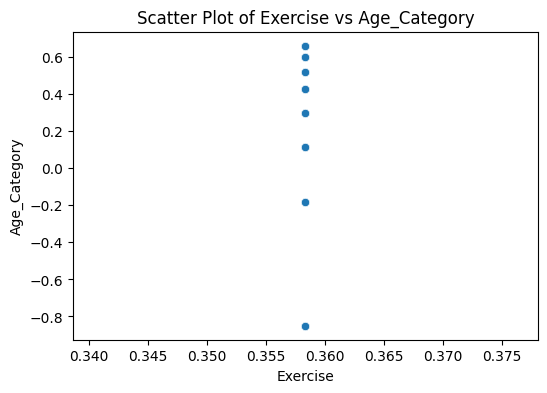

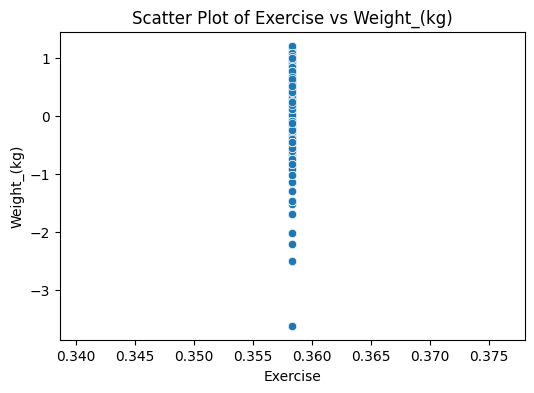

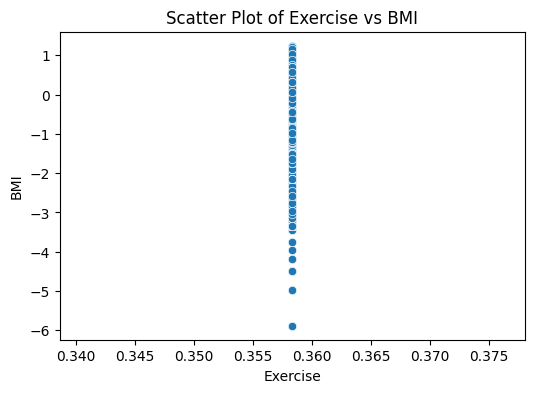

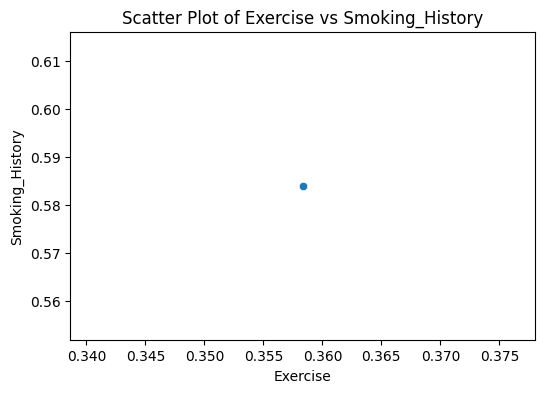

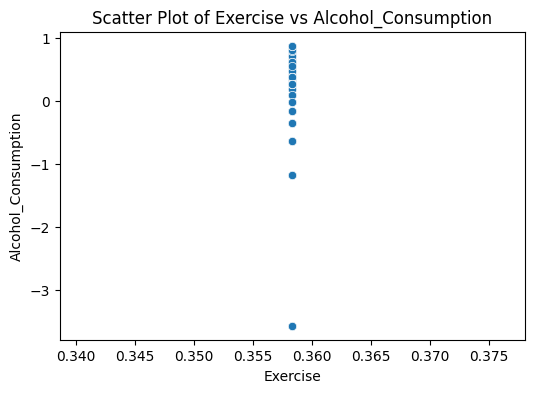

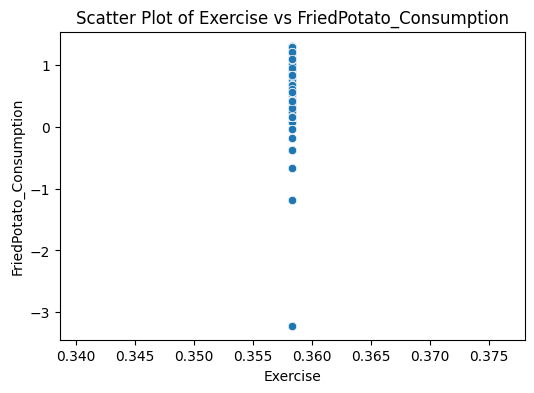

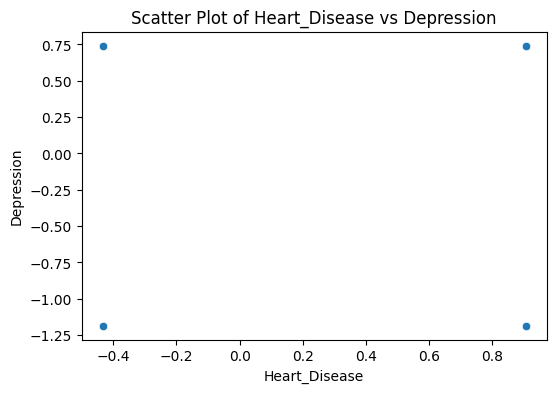

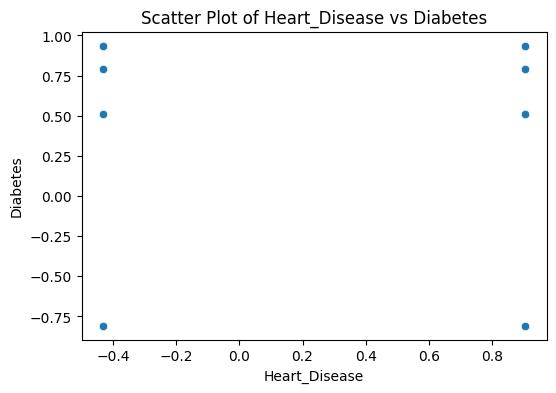

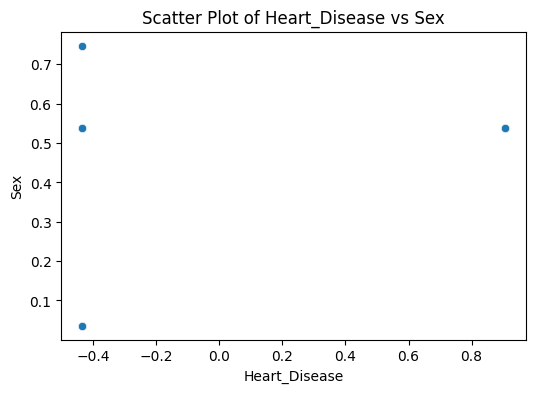

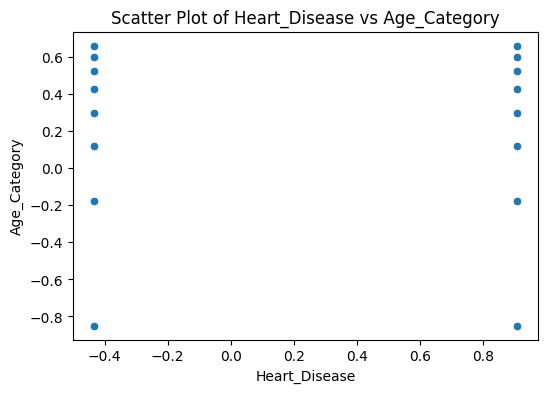

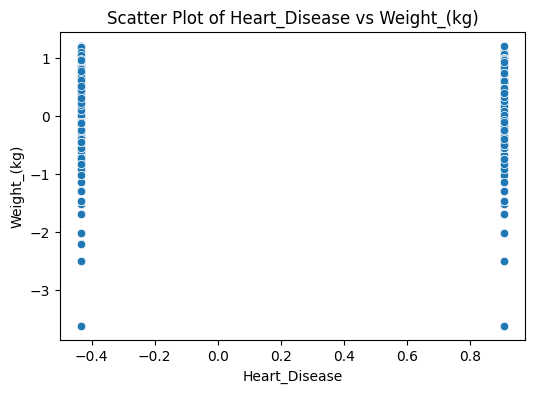

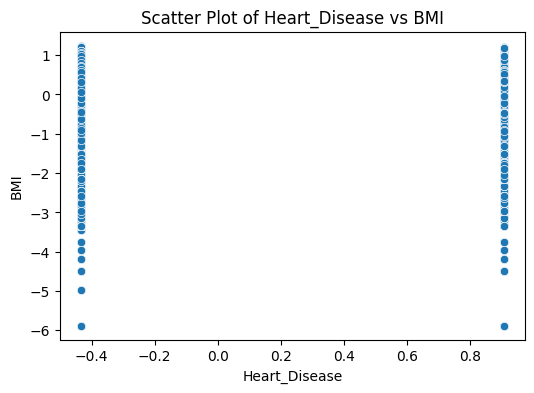

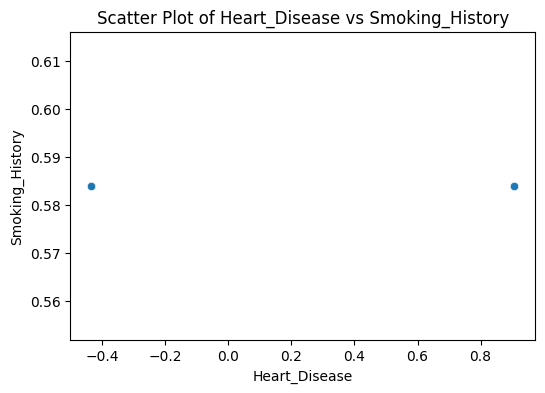

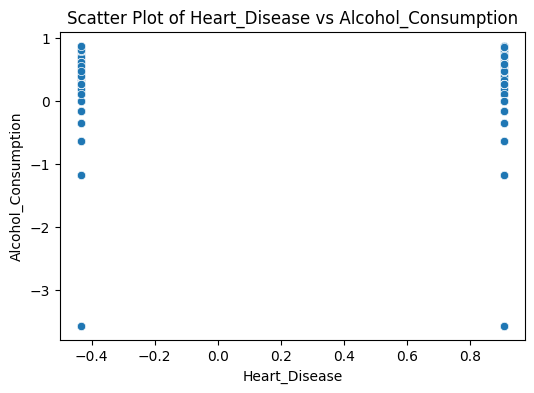

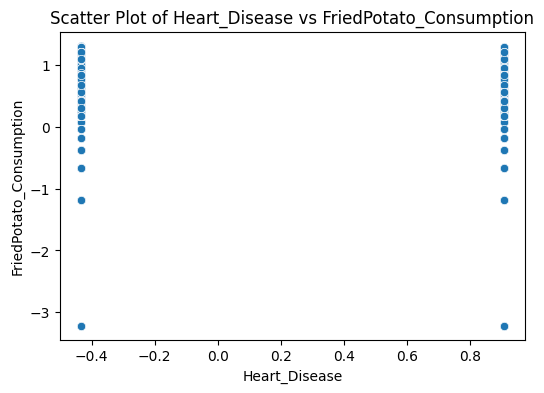

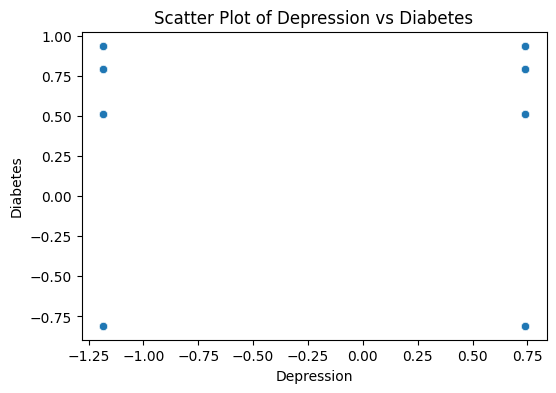

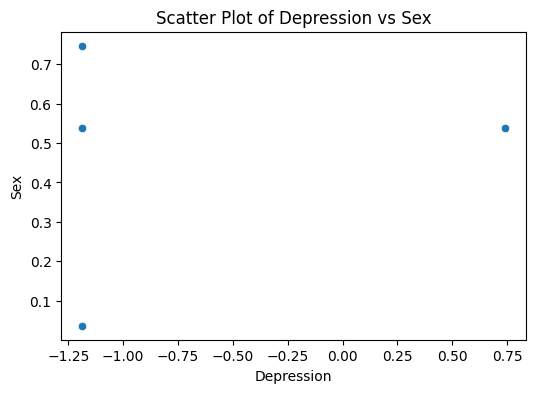

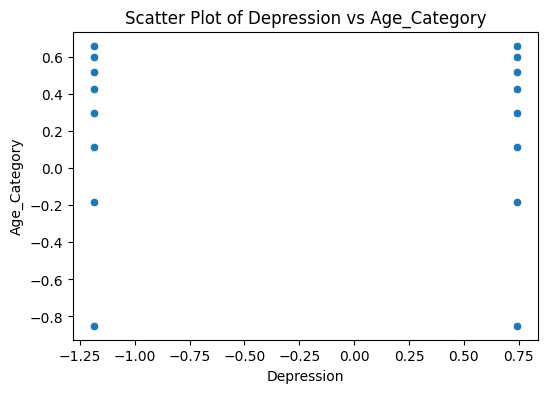

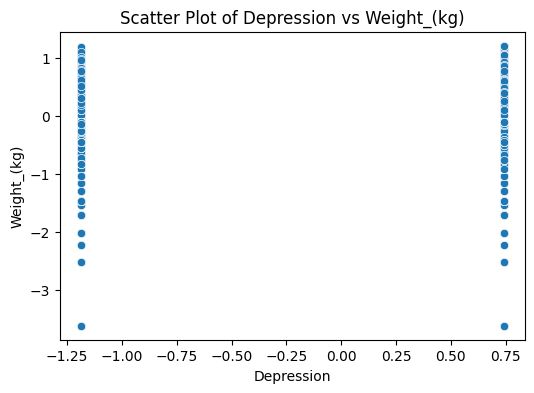

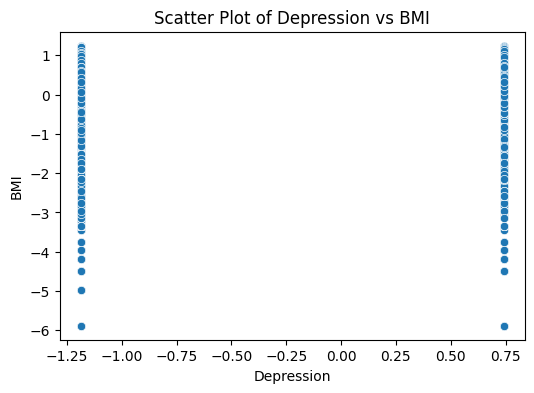

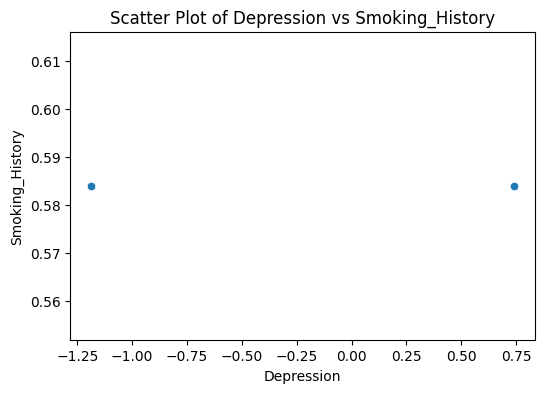

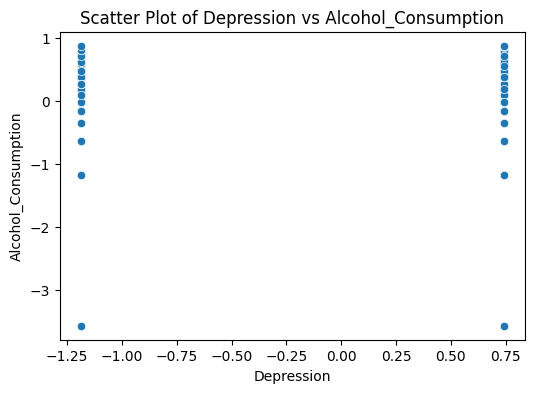

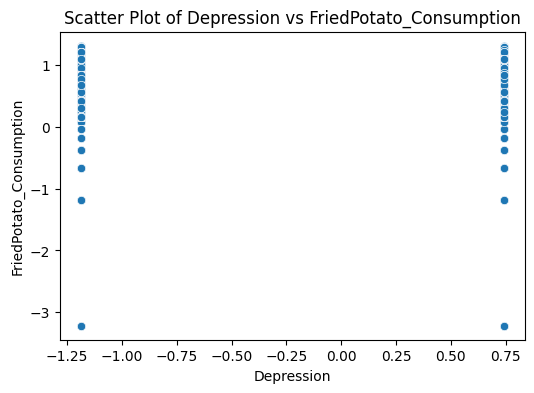

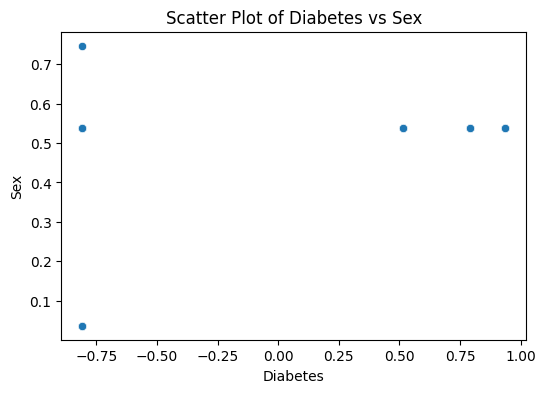

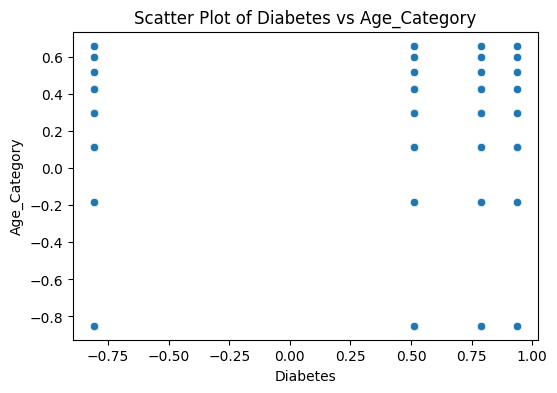

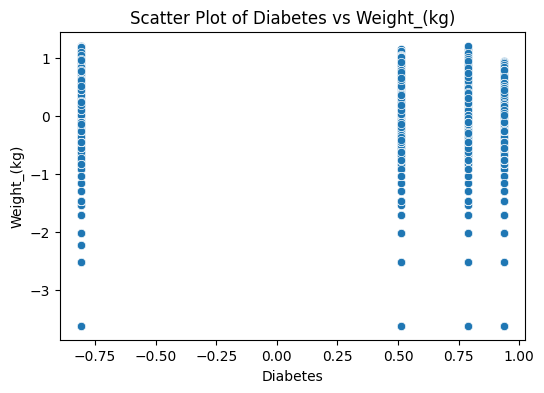

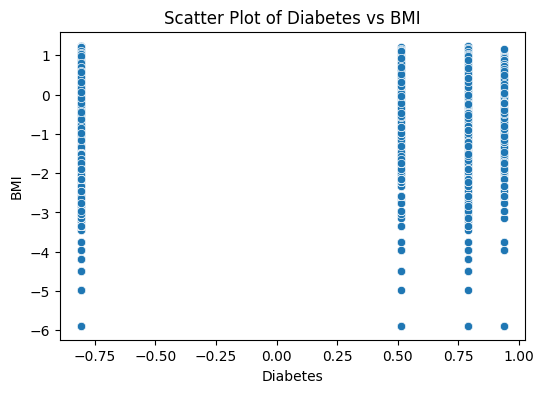

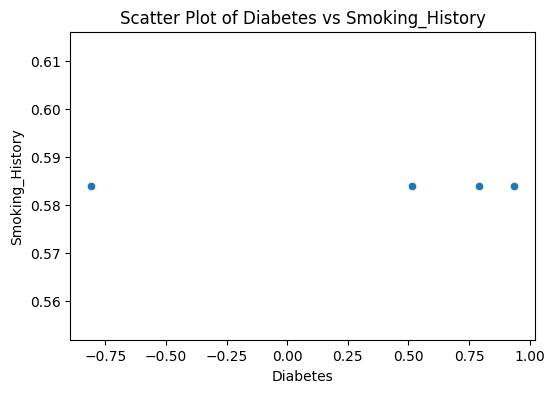

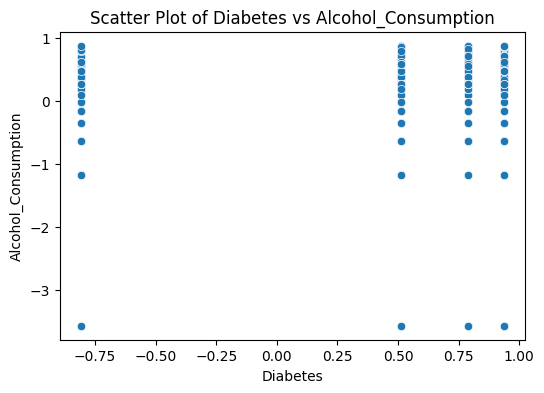

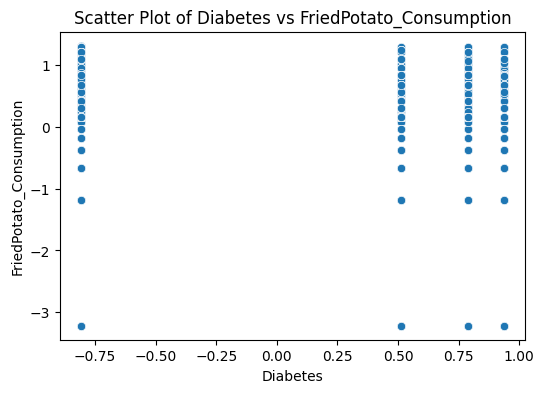

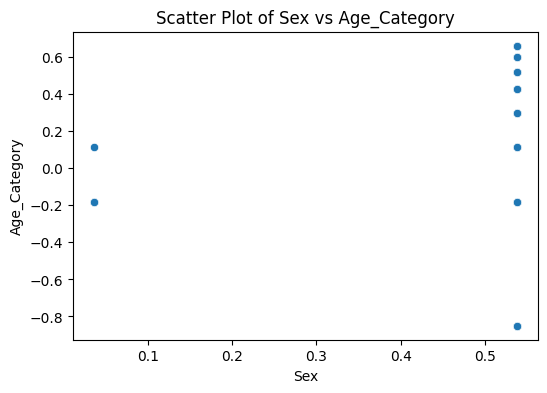

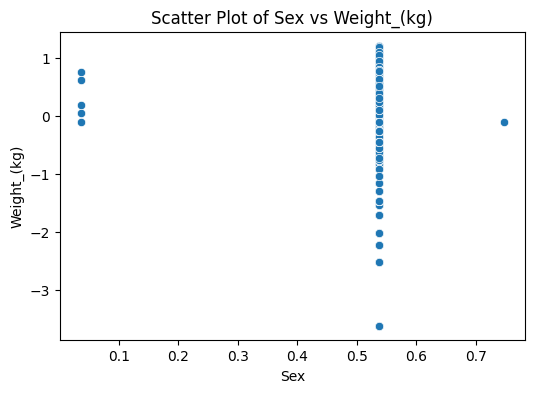

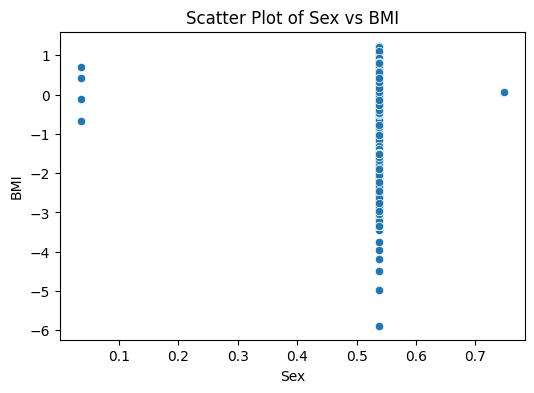

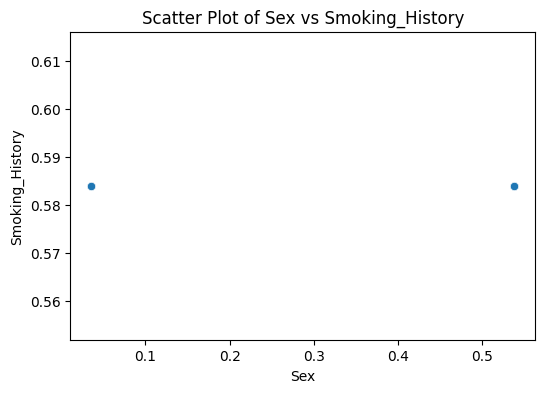

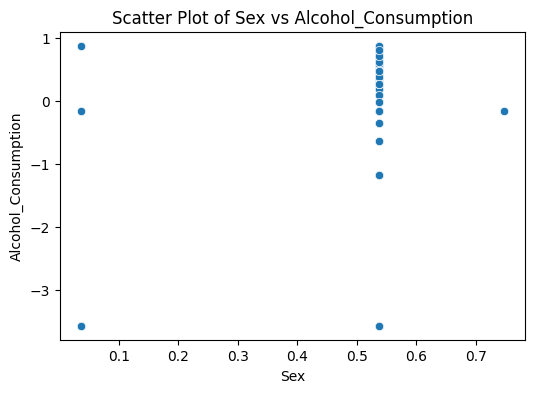

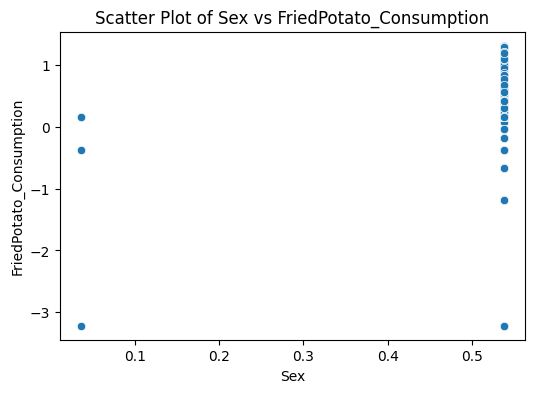

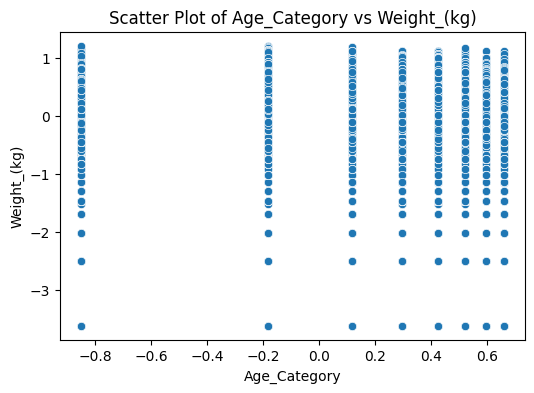

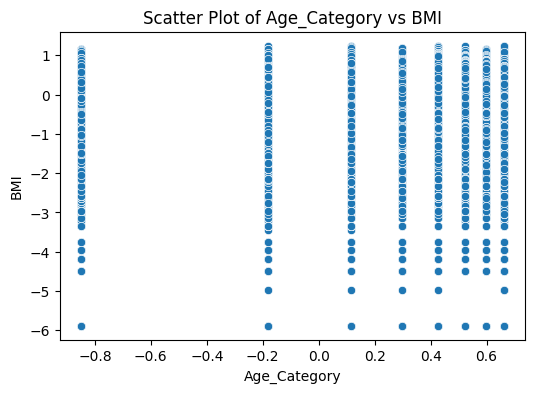

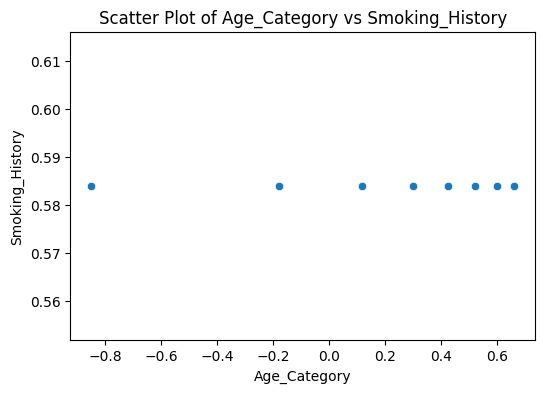

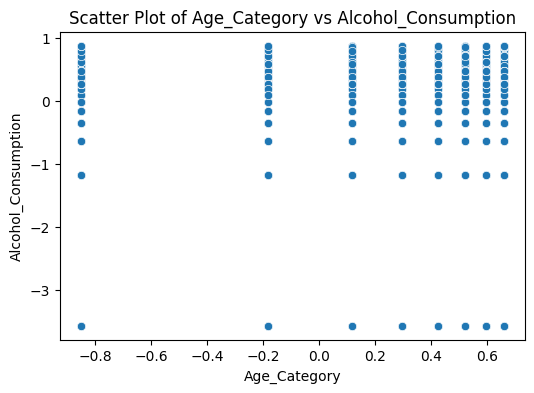

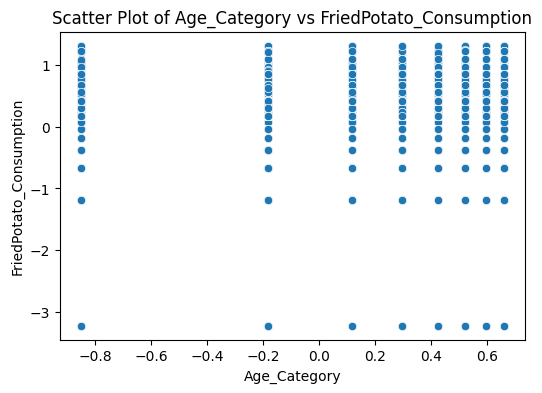

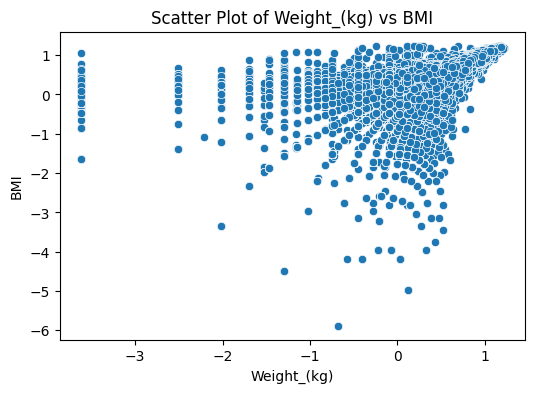

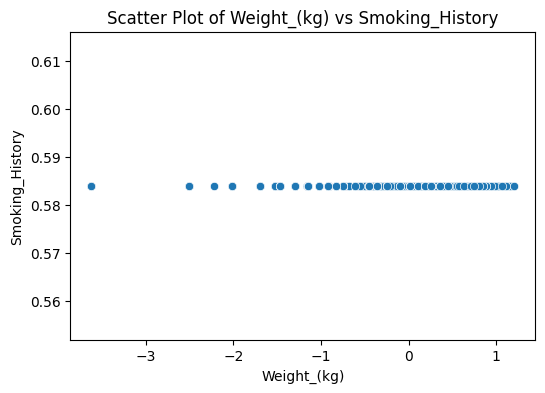

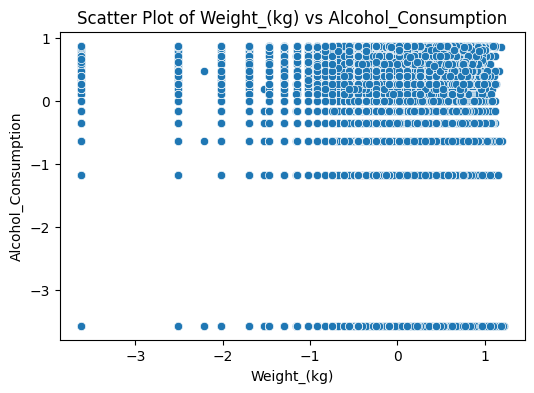

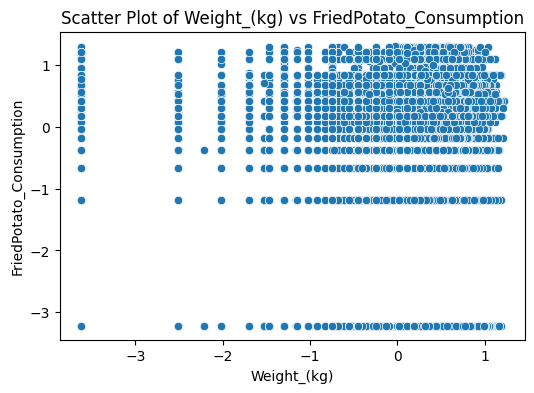

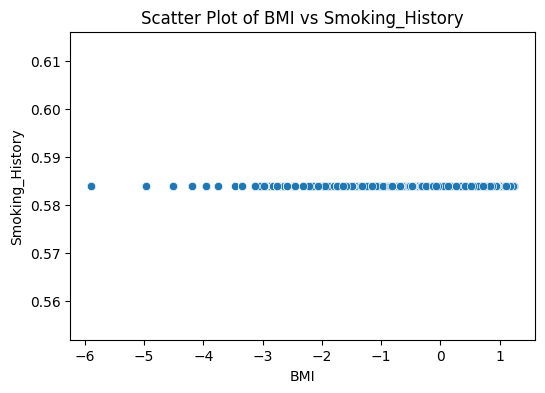

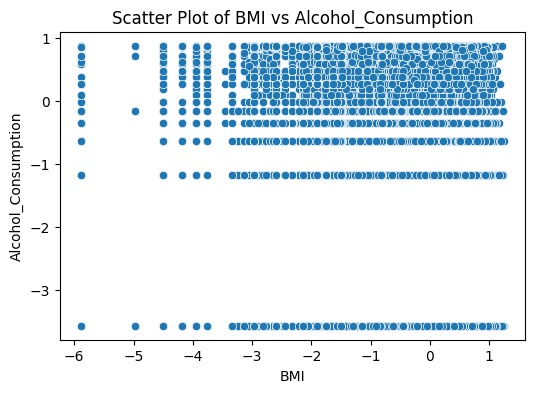

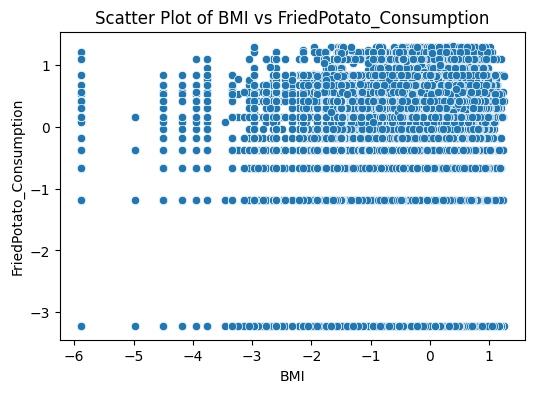

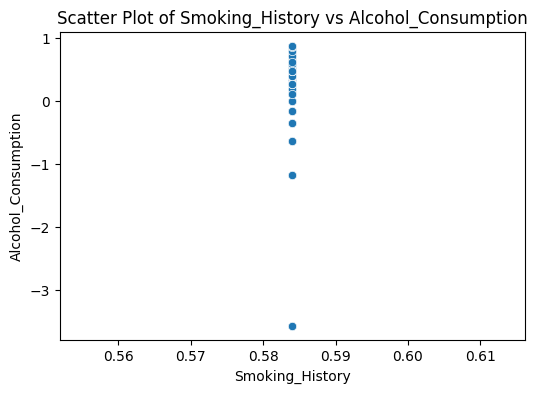

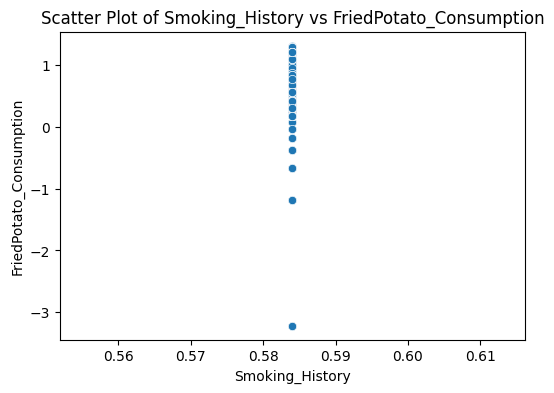

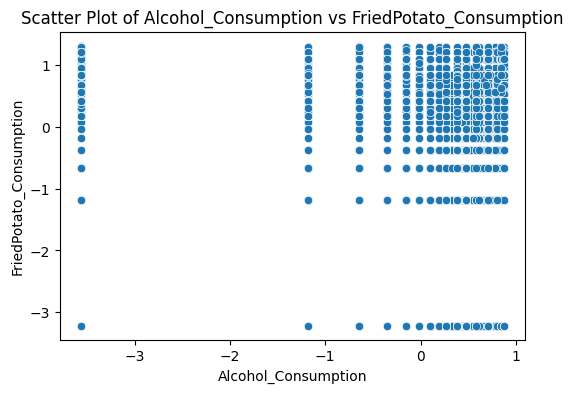

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define numerical columns
numerical_columns = ['General_Health', 'Exercise', 'Heart_Disease', 'Depression', 'Diabetes',
                     'Sex', 'Age_Category', 'Weight_(kg)', 'BMI', 'Smoking_History',
                     'Alcohol_Consumption', 'FriedPotato_Consumption']

# Generate scatter plots for each pair of numerical columns
plt.figure(figsize=(12, 8))
for i in range(len(numerical_columns)):
    for j in range(i + 1, len(numerical_columns)):  # Avoid duplicate pairs
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=data[numerical_columns[i]], y=data[numerical_columns[j]])
        plt.title(f"Scatter Plot of {numerical_columns[i]} vs {numerical_columns[j]}")
        plt.xlabel(numerical_columns[i])
        plt.ylabel(numerical_columns[j])
        plt.show()


In [101]:
numerical_columns = ['General_Health', 'Exercise', 'Heart_Disease', 'Depression', 'Diabetes',
                     'Sex', 'Age_Category', 'Weight_(kg)', 'BMI', 'Smoking_History',
                     'Alcohol_Consumption', 'FriedPotato_Consumption']

# Loop through each numerical column and compute statistics
for col in numerical_columns:
    print(f"Statistics for {col}:")
    print("Variance:", data[col].var())
    print("Standard Deviation:", data[col].std())
    print("Skewness:", data[col].skew())
    print("Kurtosis:", data[col].kurtosis())
    print("-" * 50)  # Separator for better readability


Statistics for General_Health:
Variance: 3.758952017597103
Standard Deviation: 1.9388016963055048
Skewness: 0.07629436847803872
Kurtosis: -1.525961823220325
--------------------------------------------------
Statistics for Exercise:
Variance: 0.1743414587607528
Standard Deviation: 0.4175421640514318
Skewness: -1.3175377639800534
Kurtosis: -0.2640959506953182
--------------------------------------------------
Statistics for Heart_Disease:
Variance: 0.07431393637406179
Standard Deviation: 0.2726058260090231
Skewness: 3.075152291768399
Kurtosis: 7.456609903188356
--------------------------------------------------
Statistics for Depression:
Variance: 0.16025327619642846
Standard Deviation: 0.4003164700539168
Skewness: 1.4967177418486888
Kurtosis: 0.24016555392713235
--------------------------------------------------
Statistics for Diabetes:
Variance: 0.5247308657913334
Standard Deviation: 0.7243830932533789
Skewness: 2.051541005263272
Kurtosis: 2.5499361032662393
--------------------------

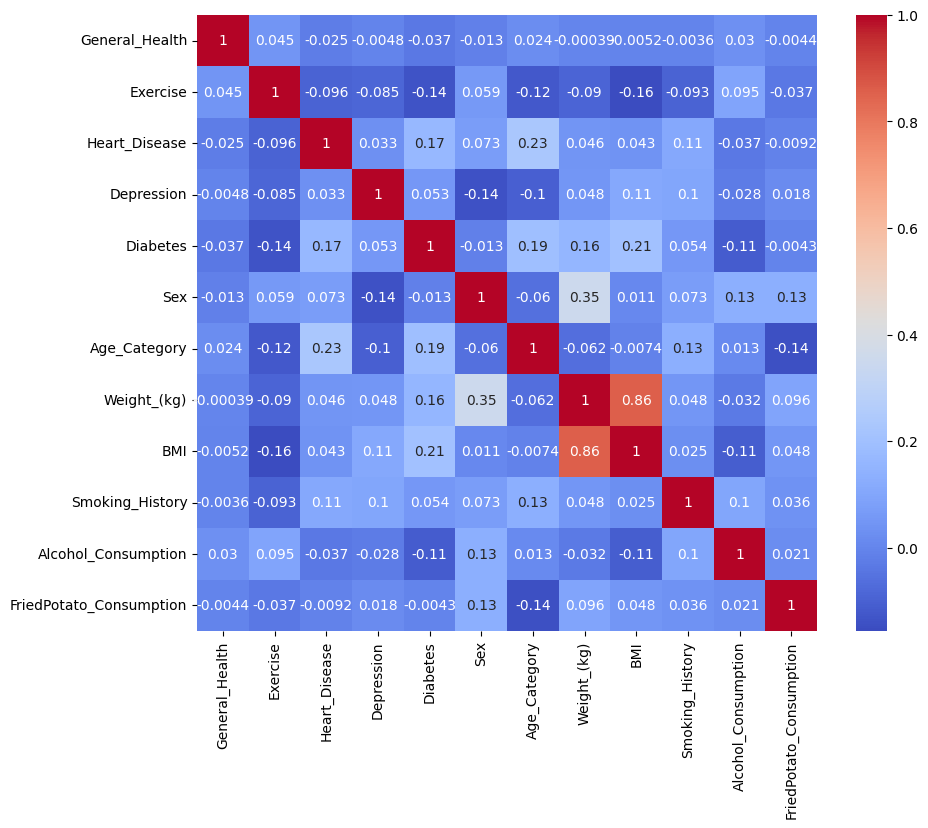

In [103]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()


In [105]:
numerical_columns = ['General_Health', 'Exercise', 'Heart_Disease', 'Depression', 'Diabetes',
                     'Sex', 'Age_Category', 'Weight_(kg)', 'BMI', 'Smoking_History',
                     'Alcohol_Consumption', 'FriedPotato_Consumption']

# Create a copy of the dataset to avoid modifying the original data
df_cleaned = data.copy()

# Apply IQR-based outlier removal for each numerical column
for col in numerical_columns:
    Q1 = df_cleaned[col].quantile(0.25)  # 25th percentile
    Q3 = df_cleaned[col].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower bound
    upper_bound = Q3 + 1.5 * IQR  # Upper bound
    
    # Remove rows with outliers for the current column
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

# Display the shape of the dataset after outlier removal
print("Original Data Shape:", data.shape)
print("Cleaned Data Shape:", df_cleaned.shape)


Original Data Shape: (308854, 12)
Cleaned Data Shape: (133810, 12)


In [110]:


# Define numerical columns
numerical_columns = ['General_Health', 'Exercise', 'Heart_Disease', 'Depression', 'Diabetes',
                     'Sex', 'Age_Category', 'Weight_(kg)', 'BMI', 'Smoking_History',
                     'Alcohol_Consumption', 'FriedPotato_Consumption']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform numerical columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Display the first few rows to check the scaling
print(data.head())


   General_Health  Exercise  Heart_Disease  Depression  Diabetes       Sex  \
0        0.171545 -1.856251      -0.296584   -0.500659 -0.425409 -0.963228   
1        1.203111 -1.856251       3.371722   -0.500659  2.335566 -0.963228   
2        1.203111  0.538720      -0.296584   -0.500659  2.335566 -0.963228   
3        0.687328  0.538720       3.371722   -0.500659  2.335566  1.038082   
4       -0.344239 -1.856251      -0.296584   -0.500659 -0.425409  1.038082   

   Age_Category  Weight_(kg)       BMI  Smoking_History  Alcohol_Consumption  \
0      0.983140    -2.386180 -2.159696         1.210630            -0.621527   
1      0.983140    -0.303547 -0.051548        -0.826016            -0.621527   
2      0.415526     0.227770  0.742649        -0.826016            -0.133707   
3      1.266947     0.461569  0.015913        -0.826016            -0.621527   
4      1.550754     0.227770 -0.652562         1.210630            -0.621527   

   FriedPotato_Consumption  
0                 0.6

In [112]:
numerical_columns = ['General_Health', 'Exercise', 'Heart_Disease', 'Depression', 'Diabetes',
                     'Sex', 'Age_Category', 'Weight_(kg)', 'BMI', 'Smoking_History',
                     'Alcohol_Consumption', 'FriedPotato_Consumption']

# Apply log transformation using log1p (log(x + 1) to avoid log(0))
data[numerical_columns] = data[numerical_columns].apply(np.log1p)

# Display the first few rows to check transformation
print(data.head())

   General_Health  Exercise  Heart_Disease  Depression  Diabetes       Sex  \
0        0.146973       NaN      -0.433567   -1.185692 -0.807653       NaN   
1        0.582143       NaN       0.906304   -1.185692  0.790565       NaN   
2        0.582143  0.358339      -0.433567   -1.185692  0.790565       NaN   
3        0.420778  0.358339       0.906304   -1.185692  0.790565  0.537668   
4       -0.548109       NaN      -0.433567   -1.185692 -0.807653  0.537668   

   Age_Category  Weight_(kg)       BMI  Smoking_History  Alcohol_Consumption  \
0      0.521576          NaN       NaN         0.584045            -3.561742   
1      0.521576    -0.449033 -0.054376              NaN            -3.561742   
2      0.298252     0.186645  0.441737              NaN            -0.154939   
3      0.597976     0.321729  0.015664              NaN            -3.561742   
4      0.660825     0.186645       NaN         0.584045            -3.561742   

   FriedPotato_Consumption  
0                 0.4

In [125]:
print("DataFrame Shape:", data.shape)
print("DataFrame Info:\n", data.info())
print("First Few Rows:\n", data.head())

DataFrame Shape: (308854, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   General_Health           217090 non-null  float64
 1   Exercise                 239381 non-null  float64
 2   Heart_Disease            308854 non-null  float64
 3   Depression               308854 non-null  float64
 4   Diabetes                 308854 non-null  float64
 5   Sex                      148658 non-null  float64
 6   Age_Category             214050 non-null  float64
 7   Weight_(kg)              223466 non-null  float64
 8   BMI                      222644 non-null  float64
 9   Smoking_History          125264 non-null  float64
 10  Alcohol_Consumption      308854 non-null  float64
 11  FriedPotato_Consumption  264621 non-null  float64
dtypes: float64(12)
memory usage: 28.3 MB
DataFrame Info:
 None
First Few Rows:
    Gener

In [131]:
X = data.drop(columns=['Heart_Disease'])  # Drop only the target column
y = data['Heart_Disease'].astype(int)  # Ensure it's in integer format


In [133]:
data.columns

Index(['General_Health', 'Exercise', 'Heart_Disease', 'Depression', 'Diabetes',
       'Sex', 'Age_Category', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [138]:
X = data.copy()  # Use all features
Y = data.copy()  # Predict all features


In [139]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)


In [141]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor  # Or use any model

model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
model.fit(X_train, Y_train)


MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

In [142]:
Y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Squared Error for Each Feature:", mse)

Mean Squared Error for Each Feature: [5.95193147e-07 3.77983463e-26 1.36690780e-26 1.24962612e-24
 1.07458228e-25 7.33116583e-09 2.87888254e-27 2.52709780e-09
 1.41664905e-08 2.00160525e-27 2.66765834e-24 3.99769702e-09]


In [143]:
print(data.var())

General_Health             2.694415e-01
Exercise                   3.081498e-33
Heart_Disease              1.334124e-01
Depression                 5.947952e-01
Diabetes                   3.335770e-01
Sex                        4.215224e-06
Age_Category               1.381909e-01
Weight_(kg)                5.366624e-01
BMI                        4.115377e-01
Smoking_History            1.232599e-32
Alcohol_Consumption        3.324703e+00
FriedPotato_Consumption    1.070119e+00
dtype: float64


In [145]:
from sklearn.linear_model import LinearRegression

model = MultiOutputRegressor(LinearRegression())
model.fit(X_train, Y_train)

MultiOutputRegressor(estimator=LinearRegression())

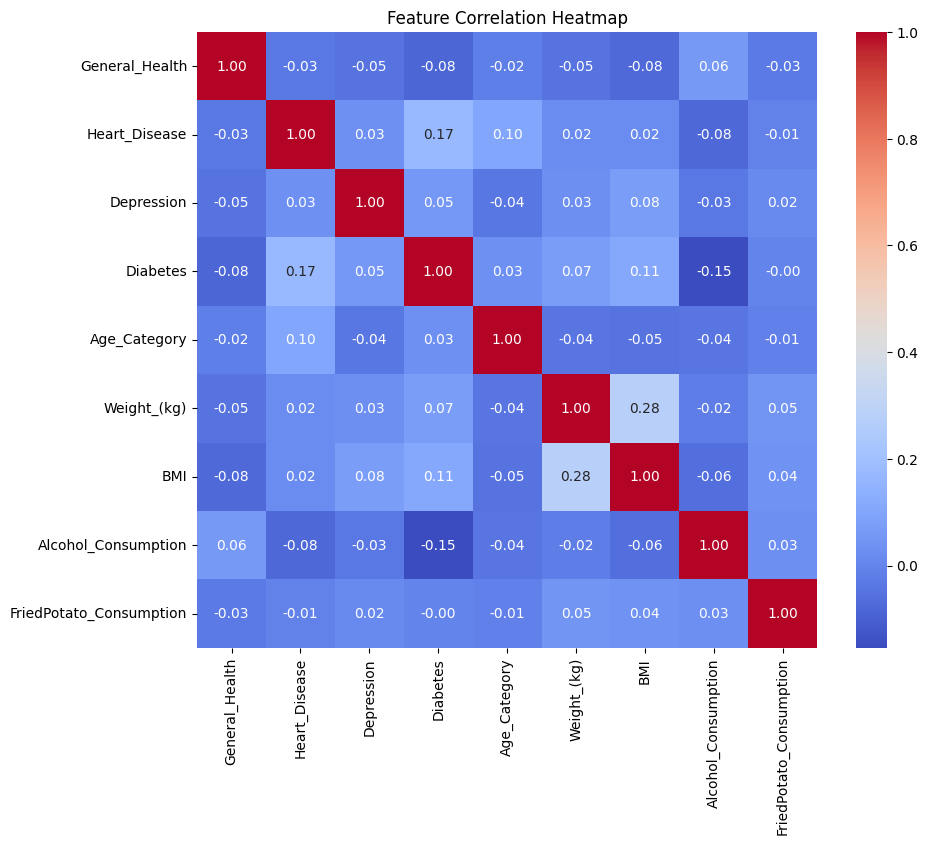

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [230]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Define input (X) and output (Y)
X = data.copy()
Y = data.copy()

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)

# Train Multi-Output Linear Regression Model
model = MultiOutputRegressor(LinearRegression())
model.fit(X_train, Y_train)

# Predict
Y_pred = model.predict(X_test)

# Evaluate with Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, Y_pred, multioutput='raw_values')
print("\n Mean Squared Error for Each Feature:", mse)



 Mean Squared Error for Each Feature: [1.21883225e-27 9.02072419e-26 1.10962970e-26 2.53102869e-25
 1.94278818e-26 8.08485581e-27 5.49708873e-29 2.43663617e-27
 2.88867066e-28]


In [222]:
correlation_threshold = 0.95
correlation_matrix = data.corr()

# Identify highly correlated features
highly_correlated_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

print("\n Removing Highly Correlated Features:", highly_correlated_features)

# Drop redundant features
data = data.drop(columns=highly_correlated_features)



 Removing Highly Correlated Features: {'zscore'}


In [223]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Define input (X) and output (Y)
X = data.copy()
Y = data.copy()

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)

# Train Multi-Output Linear Regression Model
model = MultiOutputRegressor(LinearRegression())
model.fit(X_train, Y_train)

# Predict
Y_pred = model.predict(X_test)

# Evaluate with Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, Y_pred, multioutput='raw_values')
print("\n Mean Squared Error for Each Feature:", mse)



 Mean Squared Error for Each Feature: [1.21883225e-27 9.02072419e-26 1.10962970e-26 2.53102869e-25
 1.94278818e-26 8.08485581e-27 5.49708873e-29 2.43663617e-27
 2.88867066e-28]


In [224]:
# Check variance of target variables
print("\n Target Variance:\n", Y.var())

# Remove features with very low variance (threshold: 1e-4)
low_variance_features = Y.var()[Y.var() < 1e-4].index.tolist()
print("\n Removing Low Variance Features:", low_variance_features)

# Drop them
data = data.drop(columns=low_variance_features)



 Target Variance:
 General_Health             0.269442
Heart_Disease              0.133412
Depression                 0.594795
Diabetes                   0.333577
Age_Category               0.138191
Weight_(kg)                0.536662
BMI                        0.411538
Alcohol_Consumption        3.324703
FriedPotato_Consumption    1.070119
dtype: float64

 Removing Low Variance Features: []


In [225]:
from sklearn.model_selection import cross_val_score

# Use cross-validation to check model performance
cv_scores = cross_val_score(model, X, Y, cv=5, scoring="neg_mean_squared_error")

print("\n Cross-Validation MSE Scores:", -cv_scores)
print(" Average CV MSE:", -cv_scores.mean())



 Cross-Validation MSE Scores: [2.23080809e-26 1.26441217e-26 9.86639616e-27 6.79209868e-27
 5.18723845e-26]
 Average CV MSE: 2.0696616380723903e-26


In [227]:
from sklearn.linear_model import Ridge
from sklearn.multioutput import MultiOutputRegressor

ridge_model = MultiOutputRegressor(Ridge(alpha=10))  # Increase alpha for stronger regularization
ridge_model.fit(X_train, Y_train)

# Predict and evaluate
Y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(Y_test, Y_pred_ridge, multioutput='raw_values')

print("\n Ridge Regression MSE (After Regularization):", mse_ridge)



 Ridge Regression MSE (After Regularization): [6.10139676e-09 1.27824595e-08 2.77114072e-09 5.22272372e-09
 1.20781805e-08 3.32722369e-09 4.32614672e-09 5.09567504e-10
 1.53719522e-09]


In [228]:
ridge_model = MultiOutputRegressor(Ridge(alpha=100))  # Increase alpha
ridge_model.fit(X_train, Y_train)

Y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(Y_test, Y_pred_ridge, multioutput="raw_values")

print("\ Ridge Regression MSE (Higher Regularization):", mse_ridge)


\ Ridge Regression MSE (Higher Regularization): [6.08455856e-07 1.27086563e-06 2.76765496e-07 5.20968594e-07
 1.20129091e-06 3.32181496e-07 4.31710432e-07 5.09416441e-08
 1.53613439e-07]


In [229]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge_model.fit(X_train_scaled, Y_train)
Y_pred_ridge = ridge_model.predict(X_test_scaled)

mse_ridge_scaled = mean_squared_error(Y_test, Y_pred_ridge, multioutput="raw_values")
print("\n Ridge MSE (After Normalization):", mse_ridge_scaled)



 Ridge MSE (After Normalization): [1.44201747e-06 4.07461946e-06 3.79713256e-06 4.79107531e-06
 6.20722264e-06 1.74477695e-04 1.00173853e-03 1.96154800e-05
 6.38851864e-05]


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Ridge Regression model
ridge_model.fit(X_train_scaled, Y_train)
Y_pred_ridge = ridge_model.predict(X_test_scaled)

# Evaluate Model Performance
mse_ridge = mean_squared_error(Y_test, Y_pred_ridge, multioutput="raw_values")
r2_ridge = r2_score(Y_test, Y_pred_ridge, multioutput="raw_values")
mae_ridge = mean_absolute_error(Y_test, Y_pred_ridge, multioutput="raw_values")

# Compute Adjusted R² Score
n, p = X_test.shape  # Number of samples & features
adj_r2_ridge = [1 - ((1 - r2) * (n - 1) / (n - p - 1)) for r2 in r2_ridge]

# Print Metrics
print("\n Ridge MSE (After Normalization):", mse_ridge)
print("\n R² Score (Ridge Regression):", r2_ridge)
print("\n Mean Absolute Error (MAE):", mae_ridge)
print("\n Adjusted R² Score (Ridge Regression):", adj_r2_ridge)



🔹 Ridge MSE (After Normalization): [1.44201747e-06 4.07461946e-06 3.79713256e-06 4.79107531e-06
 6.20722264e-06 1.74477695e-04 1.00173853e-03 1.96154800e-05
 6.38851864e-05]

✅ R² Score (Ridge Regression): [0.9999946  0.99996947 0.99999361 0.9999856  0.99995513 0.99967477
 0.99753422 0.99999411 0.99994026]

📉 Mean Absolute Error (MAE): [0.00110123 0.00109328 0.00155095 0.0015576  0.001762   0.00808117
 0.02080492 0.00418295 0.00545356]

📊 Adjusted R² Score (Ridge Regression): [np.float64(0.9999946022679721), np.float64(0.9999694694449022), np.float64(0.9999936049520453), np.float64(0.9999855959658941), np.float64(0.9999551258181951), np.float64(0.9996747212827405), np.float64(0.9975338646970192), np.float64(0.9999941053067104), np.float64(0.9999402467778352)]


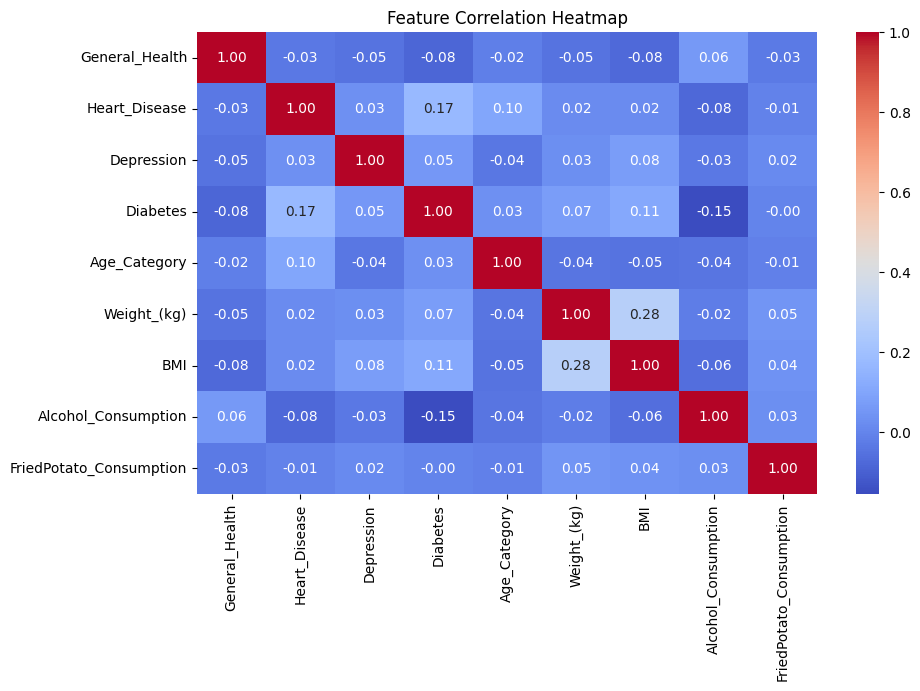

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [170]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 🚀 Train Random Forest Regressor
rf_model = MultiOutputRegressor(RandomForestRegressor(
    n_estimators=200,  # Increase trees for better generalization
    max_depth=10,      # Reduce depth to prevent overfitting
    min_samples_split=10,  # Require at least 10 samples to split a node
    random_state=42
))
rf_model.fit(X_train, Y_train)

# 📝 Make Predictions
Y_pred_rf = rf_model.predict(X_test)

# ✅ Compute Mean Squared Error (MSE) for Each Feature
mse_rf = mean_squared_error(Y_test, Y_pred_rf, multioutput="raw_values")
print("\n🌲 Random Forest MSE (After Regularization):", mse_rf)

# ✅ Compute R² Score for Each Feature
r2_scores = r2_score(Y_test, Y_pred_rf, multioutput="raw_values")
print("\n📊 R² Scores for Each Feature:", r2_scores)



🌲 Random Forest MSE (After Regularization): [7.38890501e-07 1.27522249e-26 1.25408961e-24 1.06931878e-25
 3.24062834e-27 4.75987424e-08 1.21436741e-07 2.65786780e-24
 7.41613295e-09]

📊 R² Scores for Each Feature: [0.99999723 1.         1.         1.         1.         0.99999991
 0.9999997  1.         0.99999999]


In [183]:
# Drop selected features from training and testing data
features_to_drop = ["Alcohol_Consumption", "FriedPotato_Consumption"]
X_train_filtered = X_train.drop(columns=features_to_drop)
X_test_filtered = X_test.drop(columns=features_to_drop)

# Check the shape after dropping
print("New X_train shape:", X_train_filtered.shape)
print("New X_test shape:", X_test_filtered.shape)


New X_train shape: (247083, 7)
New X_test shape: (61771, 7)


In [184]:
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

# Drop overfitting features
features_to_drop = ["Alcohol_Consumption", "FriedPotato_Consumption"]
X_train_filtered = X_train.drop(columns=features_to_drop)
X_test_filtered = X_test.drop(columns=features_to_drop)

# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_filtered)
X_test_scaled = scaler.transform(X_test_filtered)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, Y_train)
Y_pred_ridge = ridge.predict(X_test_scaled)

# ElasticNet Regression
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic_net.fit(X_train_scaled, Y_train)
Y_pred_elastic = elastic_net.predict(X_test_scaled)

# Random Forest Regressor
rf_model = MultiOutputRegressor(RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=10,
    random_state=42
))
rf_model.fit(X_train_filtered, Y_train)
Y_pred_rf = rf_model.predict(X_test_filtered)

# Gradient Boosting Regressor
gbr_model = MultiOutputRegressor(GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
))
gbr_model.fit(X_train_filtered, Y_train)
Y_pred_gbr = gbr_model.predict(X_test_filtered)

# Model Performance Evaluation
mse_ridge = mean_squared_error(Y_test, Y_pred_ridge, multioutput="raw_values")
r2_ridge = r2_score(Y_test, Y_pred_ridge, multioutput="raw_values")
mae_ridge = mean_absolute_error(Y_test, Y_pred_ridge, multioutput="raw_values")

mse_elastic = mean_squared_error(Y_test, Y_pred_elastic, multioutput="raw_values")
r2_elastic = r2_score(Y_test, Y_pred_elastic, multioutput="raw_values")

mse_rf = mean_squared_error(Y_test, Y_pred_rf, multioutput="raw_values")
r2_rf = r2_score(Y_test, Y_pred_rf, multioutput="raw_values")

mse_gbr = mean_squared_error(Y_test, Y_pred_gbr, multioutput="raw_values")
r2_gbr = r2_score(Y_test, Y_pred_gbr, multioutput="raw_values")

# Print Performance Metrics
print("\n🔹 Ridge MSE:", mse_ridge)
print("✅ R² Score (Ridge Regression):", r2_ridge)
print("📉 Mean Absolute Error (Ridge):", mae_ridge)

print("\n🔹 ElasticNet MSE:", mse_elastic)
print("✅ R² Score (ElasticNet):", r2_elastic)

print("\n🌲 Random Forest MSE:", mse_rf)
print("✅ R² Score (Random Forest):", r2_rf)

print("\n🚀 Gradient Boosting MSE:", mse_gbr)
print("✅ R² Score (Gradient Boosting):", r2_gbr)



🔹 Ridge MSE: [1.44561808e-10 4.11363227e-10 3.81485018e-10 4.75361759e-10
 6.28413238e-10 1.82175486e-08 1.11390175e-07 3.21570434e+00
 1.06569207e+00]
✅ R² Score (Ridge Regression): [1.         1.         1.         1.         1.         0.99999997
 0.99999973 0.03378204 0.00337996]
📉 Mean Absolute Error (Ridge): [1.10345300e-05 1.09951785e-05 1.55458161e-05 1.56046628e-05
 1.77227320e-05 8.24593777e-05 2.19202873e-04 1.69410465e+00
 7.03541539e-01]

🔹 ElasticNet MSE: [0.2672349  0.13347983 0.59384896 0.33266999 0.13834521 0.53649433
 0.40627912 3.32819858 1.06930637]
✅ R² Score (ElasticNet): [-1.62793342e-04 -4.26808089e-08 -1.76224818e-06 -3.41690021e-06
 -1.37463751e-07 -4.05029014e-05 -5.46716165e-05 -1.89351941e-05
 -8.39349916e-08]

🌲 Random Forest MSE: [7.38890501e-07 9.13833892e-27 1.25276775e-24 1.06200302e-25
 3.31209146e-27 4.76048550e-08 1.21955184e-07 3.11720740e+00
 1.04428677e+00]
✅ R² Score (Random Forest): [0.99999723 1.         1.         1.         1.         0.999

In [233]:
from sklearn.metrics import accuracy_score, confusion_matrix
threshold = 0.6

Y_train_binary = (Y_train > threshold).astype(int)
Y_test_binary = (Y_test > threshold).astype(int)


Y_pred_binary = (Y_pred_rf > threshold).astype(int)

accuracies = [accuracy_score(Y_test_binary.iloc[:, i], Y_pred_binary[:, i]) for i in range(Y_test.shape[1])]
avg_accuracy = sum(accuracies) / len(accuracies)


conf_matrices = [confusion_matrix(Y_test_binary.iloc[:, i], Y_pred_binary[:, i]) for i in range(Y_test.shape[1])]


print("\n Estimated Accuracy for Each Feature:", accuracies)
print("\n Estimated Average Accuracy:", avg_accuracy)

for i, cm in enumerate(conf_matrices):
    print(f"\n Confusion Matrix for Feature {i+1}:\n", cm)



 Estimated Accuracy for Each Feature: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8836670929724304, 0.9369768985446245]

 Estimated Average Accuracy: 0.9800715546130062

 Confusion Matrix for Feature 1:
 [[61770     0]
 [    0     1]]

 Confusion Matrix for Feature 2:
 [[56774     0]
 [    0  4997]]

 Confusion Matrix for Feature 3:
 [[49417     0]
 [    0 12354]]

 Confusion Matrix for Feature 4:
 [[53262     0]
 [    0  8509]]

 Confusion Matrix for Feature 5:
 [[57338     0]
 [    0  4433]]

 Confusion Matrix for Feature 6:
 [[55464     0]
 [    0  6307]]

 Confusion Matrix for Feature 7:
 [[55775     0]
 [    0  5996]]

 Confusion Matrix for Feature 8:
 [[54585     0]
 [ 7186     0]]

 Confusion Matrix for Feature 9:
 [[57878     0]
 [ 3893     0]]
